In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# CLUSTERIZACION MUNICIPIO DE BARAYA TESIS MAESTRIA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('/content/drive/MyDrive/data_cacao_project/Datos_estructurados_Baraya/merged_full_V2.xlsx')

In [4]:
df.head()

,Unnamed: 0,id,viven_en_el_predio_de_caco,chum_2,chum_3,chum_5,cfis_1,cfis_2,cfis_3,cfis_4,...,A,AR,L,Textura,Dr,Da,n,NDRE_Promedio,NDVI_Promedio,TEMP_Promedio
0,0,bar1,si,alto_,mano_de_obra_medianamente_calif,no,escriturado_,media,trocha,no,...,19.30,26.40,54.30,FL,2.30,1.41,38.73,0.41,0.85,31.80
1,1,bar2,no,alto_,mano_de_obra_medianamente_calif,no,escriturado_,media,trocha,no,...,38.67,34.50,26.83,FAr,2.39,1.25,47.70,0.42,0.86,28.97
2,2,bar3,no,medio,mano_de_obra_altamente_califica,no,carta_venta,media,trocha,no,...,43.70,32.10,24.20,FAr,2.36,1.27,46.19,0.16,0.50,33.45
3,3,bar4,no,bajo,mano_de_obra_medianamente_calif,no,no_reporta_ninguna_forma_legal_,alta,placa_huella_,no,...,29.50,40.20,30.30,Ar,2.38,1.15,51.68,0.18,0.55,35.59
4,4,bar5,no,alto_,mano_de_obra_medianamente_calif,no,no_reporta_ninguna_forma_legal_,media,trocha,no,...,47.60,30.10,22.30,FAr,2.46,1.33,45.93,0.24,0.47,32.44


In [5]:
df['Textura'].unique()


array(['FL', 'FAr', 'Ar', 'FArA', 'FA', 'F', 'FArL', 'AF', 'A', 'ArA'],
      dtype=object)

In [6]:
df.shape

(103, 86)

In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.head()

,Unnamed: 0,id,viven_en_el_predio_de_caco,chum_2,chum_3,chum_5,cfis_1,cfis_2,cfis_3,cfis_4,...,A,AR,L,Textura,Dr,Da,n,NDRE_Promedio,NDVI_Promedio,TEMP_Promedio
0,0,bar1,si,alto_,mano_de_obra_medianamente_calif,no,escriturado_,media,trocha,no,...,19.30,26.40,54.30,FL,2.30,1.41,38.73,0.41,0.85,31.80
1,1,bar2,no,alto_,mano_de_obra_medianamente_calif,no,escriturado_,media,trocha,no,...,38.67,34.50,26.83,FAr,2.39,1.25,47.70,0.42,0.86,28.97
2,2,bar3,no,medio,mano_de_obra_altamente_califica,no,carta_venta,media,trocha,no,...,43.70,32.10,24.20,FAr,2.36,1.27,46.19,0.16,0.50,33.45
3,3,bar4,no,bajo,mano_de_obra_medianamente_calif,no,no_reporta_ninguna_forma_legal_,alta,placa_huella_,no,...,29.50,40.20,30.30,Ar,2.38,1.15,51.68,0.18,0.55,35.59
4,4,bar5,no,alto_,mano_de_obra_medianamente_calif,no,no_reporta_ninguna_forma_legal_,media,trocha,no,...,47.60,30.10,22.30,FAr,2.46,1.33,45.93,0.24,0.47,32.44


In [9]:
df_2 = df.drop(columns='id', axis=1)

In [10]:
df_2.head()

,Unnamed: 0,viven_en_el_predio_de_caco,chum_2,chum_3,chum_5,cfis_1,cfis_2,cfis_3,cfis_4,cfis_5,...,A,AR,L,Textura,Dr,Da,n,NDRE_Promedio,NDVI_Promedio,TEMP_Promedio
0,0,si,alto_,mano_de_obra_medianamente_calif,no,escriturado_,media,trocha,no,no,...,19.30,26.40,54.30,FL,2.30,1.41,38.73,0.41,0.85,31.80
1,1,no,alto_,mano_de_obra_medianamente_calif,no,escriturado_,media,trocha,no,no,...,38.67,34.50,26.83,FAr,2.39,1.25,47.70,0.42,0.86,28.97
2,2,no,medio,mano_de_obra_altamente_califica,no,carta_venta,media,trocha,no,no,...,43.70,32.10,24.20,FAr,2.36,1.27,46.19,0.16,0.50,33.45
3,3,no,bajo,mano_de_obra_medianamente_calif,no,no_reporta_ninguna_forma_legal_,alta,placa_huella_,no,no,...,29.50,40.20,30.30,Ar,2.38,1.15,51.68,0.18,0.55,35.59
4,4,no,alto_,mano_de_obra_medianamente_calif,no,no_reporta_ninguna_forma_legal_,media,trocha,no,no,...,47.60,30.10,22.30,FAr,2.46,1.33,45.93,0.24,0.47,32.44


# ONE HOT ENCODING

In [11]:
#conversion de variables tipo  object -> category
object_columns = df_2.select_dtypes(include='object').columns
df_2[object_columns] = df_2[object_columns].astype('category')

In [12]:
columnas_cat = df_2.select_dtypes(include='category').columns.tolist() #seleccion de variables de tipo category

In [13]:
df_encoded = pd.get_dummies(df_2, columns=columnas_cat, drop_first=True) # transformacion de variables categoricas a numericas -> one hot encoding

In [14]:
#convertir las variables de tipo uint8 a int64
for col in df_encoded.columns:
  if df_encoded[col].dtype == 'uint8':
    df_encoded[col]= df_encoded[col].astype('int64')

In [15]:
df_2.dtypes

,0
Unnamed: 0,int64
viven_en_el_predio_de_caco,category
chum_2,category
chum_3,category
chum_5,category
...,...
Da,float64
n,float64
NDRE_Promedio,float64
NDVI_Promedio,float64


#ESCALAMIENTO DE DATOS

In [16]:
from sklearn.preprocessing import StandardScaler #Importancion de standardScaler

In [17]:
scaler = StandardScaler()
df_baraya_scaled = scaler.fit_transform(df_encoded)# estandarizar las variables en una dsitribucion normal estandar -> mean =0 , var=1

In [18]:
df_baraya_scaled = pd.DataFrame(df_baraya_scaled, columns=df_encoded.columns)# estandarizacion en forma de data frame

In [19]:
df_baraya_scaled

,Unnamed: 0,atp,ctl,acc,ec,rph,chum_1,chum_4,cdta,fdta,...,pstc_4_terceros_intermediarios,Textura_AF,Textura_Ar,Textura_ArA,Textura_F,Textura_FA,Textura_FAr,Textura_FArA,Textura_FArL,Textura_FL
0,-1.72,-0.33,-0.58,-0.41,-0.97,0.97,-0.33,0.04,-0.34,-0.17,...,-1.09,-0.10,-0.36,-0.10,-0.27,-0.48,-0.54,-0.73,-0.10,7.11
1,-1.68,-0.33,-0.58,-0.41,-0.87,0.97,-0.20,0.04,-0.34,-0.17,...,-1.09,-0.10,-0.36,-0.10,-0.27,-0.48,1.87,-0.73,-0.10,-0.14
2,-1.65,-0.34,-0.58,-0.22,-0.42,1.20,-0.20,-1.00,-0.34,2.13,...,-1.09,-0.10,-0.36,-0.10,-0.27,-0.48,1.87,-0.73,-0.10,-0.14
3,-1.61,-0.34,-0.58,-0.22,-0.42,0.50,0.00,0.00,0.00,-0.00,...,0.92,-0.10,2.75,-0.10,-0.27,-0.48,-0.54,-0.73,-0.10,-0.14
4,-1.58,-0.27,-0.58,-0.59,0.71,0.50,0.00,0.00,0.00,-0.00,...,0.92,-0.10,-0.36,-0.10,-0.27,-0.48,1.87,-0.73,-0.10,-0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1.58,-0.34,0.50,-0.41,1.38,0.97,-0.20,-1.00,-0.34,-0.40,...,0.92,-0.10,-0.36,-0.10,-0.27,2.10,-0.54,-0.73,-0.10,-0.14
99,1.61,1.00,-0.58,2.54,0.93,0.27,-0.85,0.04,-0.34,2.13,...,-1.09,-0.10,-0.36,-0.10,3.70,-0.48,-0.54,-0.73,-0.10,-0.14
100,1.65,1.00,-0.58,0.11,0.93,0.27,-0.85,0.04,-0.34,-0.40,...,-1.09,-0.10,-0.36,-0.10,-0.27,2.10,-0.54,-0.73,-0.10,-0.14
101,1.68,-0.36,-0.58,-0.59,0.93,-0.66,-0.85,0.04,-0.34,0.40,...,0.92,-0.10,-0.36,-0.10,-0.27,-0.48,-0.54,1.36,-0.10,-0.14


### PCA

In [20]:
import numpy as np

rango = np.linalg.matrix_rank(df_baraya_scaled)
num_variables = df_baraya_scaled.shape[1]

if rango < num_variables:
    print(f"Existen variables redundantes. Rango: {rango}, Variables: {num_variables}")
else:
    print("Las variables son linealmente independientes")


Existen variables redundantes. Rango: 102, Variables: 193


In [21]:
from scipy.linalg import null_space

ns = null_space(df_baraya_scaled)

if ns.size == 0:
    print("No hay combinaciones lineales entre variables")
else:
    print("Hay dependencia lineal entre variables")
    print("Direcciones de combinación lineal:\n", ns)


Hay dependencia lineal entre variables
Direcciones de combinación lineal:
 [[-0.02826668  0.34336496 -0.01345365 ... -0.05964108  0.04304031
   0.26963394]
 [ 0.02072656 -0.39527419  0.00199835 ... -0.10019597  0.0728939
  -0.29746688]
 [-0.00905147 -0.01376756 -0.0811644  ... -0.02310297 -0.10752899
  -0.04570477]
 ...
 [ 0.01884786  0.00647703 -0.05711252 ...  0.43352197  0.01899015
   0.04528209]
 [ 0.00098989  0.02497601 -0.0073375  ... -0.02449842  0.33163285
   0.14793747]
 [ 0.00661685 -0.18591092  0.02697151 ...  0.06676255  0.05599912
   0.27566686]]


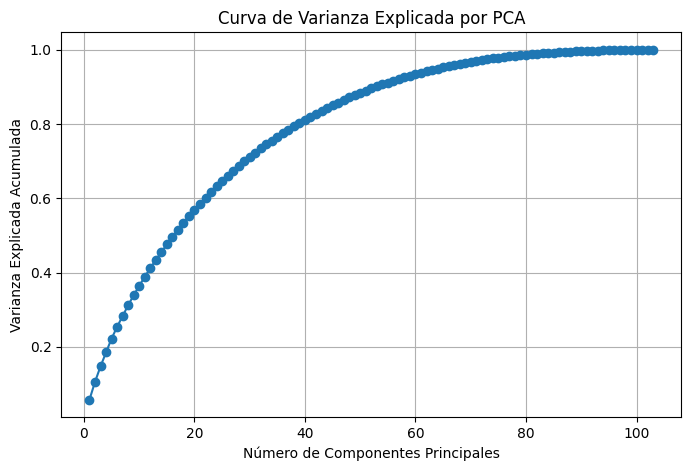

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA()
pca.fit(df_baraya_scaled)

# Obtener la varianza explicada acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(8,5))
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Curva de Varianza Explicada por PCA')
plt.grid()
plt.show()


#APLICAR REDUCCION DE DIMENSIONALIDAD POR UMAP
UMAP se basa en teorías de geometría de Rimman y topología, específicamente en la estructura de variedades.

fuente metodologica -> [1] M. Rovira, K. Engvall, y C. Duwig, «Identifying key features in reactive flows: A tutorial on combining dimensionality reduction, unsupervised clustering, and feature correlation», Chemical Engineering Journal, vol. 438, p. 135250, jun. 2022, doi: 10.1016/j.cej.2022.135250.

[2] E. Fooladgar y C. Duwig, «A new post-processing technique for analyzing high-dimensional combustion data», Combustion and Flame, vol. 191, pp. 226-238, may 2018, doi: 10.1016/j.combustflame.2018.01.014.

[3] L. McInnes, J. Healy, y J. Melville, «UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction». arXiv, 17 de septiembre de 2020. doi: 10.48550/arXiv.1802.03426.



In [23]:
#!pip uninstall -y umap-learn scipy joblib

In [24]:
!pip install \
    umap-learn==0.5.6 \
    scipy==1.14.1 \
    joblib==1.4.2

In [25]:
#!pip install umap-learn==0.5.6 #Importacion de UMAP

In [26]:
!pip install hdbscan #importacion de algoritmoi de closterizacion basado en densidades jerarquica
import hdbscan
from hdbscan import HDBSCAN
from joblib import Memory

In [27]:
import umap
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


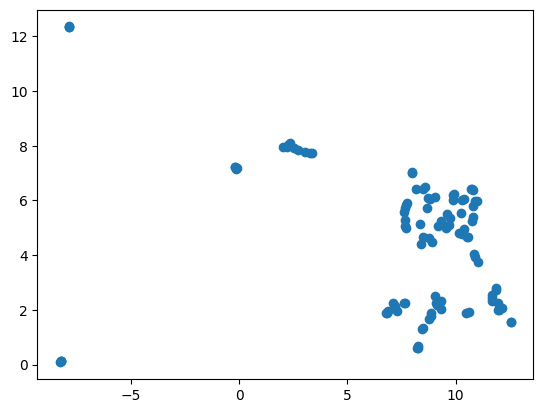

In [28]:
umap_model = umap.UMAP(
    n_neighbors=3,
    min_dist= 0.04,
    random_state= 75,
    n_components=2,
    n_jobs=-1)

umap_transform = umap_model.fit_transform(df_baraya_scaled)
umap_1 = umap_transform[:,0]
umap_2 = umap_transform[:,1]
plt.scatter(umap_1, umap_2)

plt.show()


# HDBSCAN
algoritmo de clustrerizacion no supervisado basada en densidades y jerarquias.

referencia metodologica -> [1] A. Saxena et al., «A review of clustering techniques and developments», Neurocomputing, vol. 267, pp. 664-681, dic. 2017, doi: 10.1016/j.neucom.2017.06.053.

[2] R. J. G. B. Campello, D. Moulavi, y J. Sander, «Density-Based Clustering Based on Hierarchical Density Estimates», en Advances in Knowledge Discovery and Data Mining, vol. 7819, J. Pei, V. S. Tseng, L. Cao, H. Motoda, y G. Xu, Eds., en Lecture Notes in Computer Science, vol. 7819. , Berlin, Heidelberg: Springer Berlin Heidelberg, 2013, pp. 160-172. doi: 10.1007/978-3-642-37456-2_14.



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


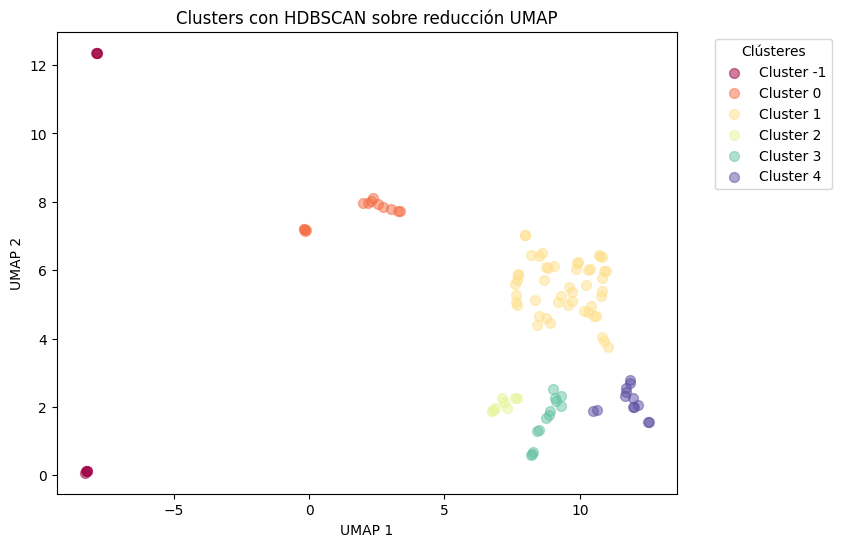

In [29]:
clusterer = hdbscan.HDBSCAN(min_samples=2, min_cluster_size=6
                            , allow_single_cluster=True, metric='euclidean' )
cluster_labels_hdbscan = clusterer.fit_predict(umap_transform)
unique_labels = np.unique(cluster_labels_hdbscan)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8, 6))

# Graficar cada clúster con su color
for label, color in zip(unique_labels, colors):
    mask = cluster_labels_hdbscan == label
    plt.scatter(umap_transform[mask, 0], umap_transform[mask, 1],
                label=f'Cluster {label}', color=color, s=50, alpha=0.5)

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("Clusters con HDBSCAN sobre reducción UMAP")
plt.legend(title="Clústeres", bbox_to_anchor=(1.05, 1), loc='upper left')  # Agrega la leyenda
plt.show()

In [30]:
cluster_labels_hdbscan # etiquetas del cluster

array([ 1,  1,  3,  1,  1,  3,  3,  4,  4,  3,  1,  1,  1,  3,  3,  3,  3,
        3,  3,  3,  3, -1, -1, -1,  2,  1,  2,  1,  2,  2,  2,  2,  2,  1,
        2,  1,  1, -1, -1, -1, -1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  1,
        1,  4,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  0,  1,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,
        0])

In [31]:
pd.crosstab(cluster_labels_hdbscan, columns='count') # tabla de frecuencia por cluster

col_0,count
row_0,
-1,7
0,13
1,49
2,8
3,13
4,13


<Axes: ylabel='$\\lambda$ value'>

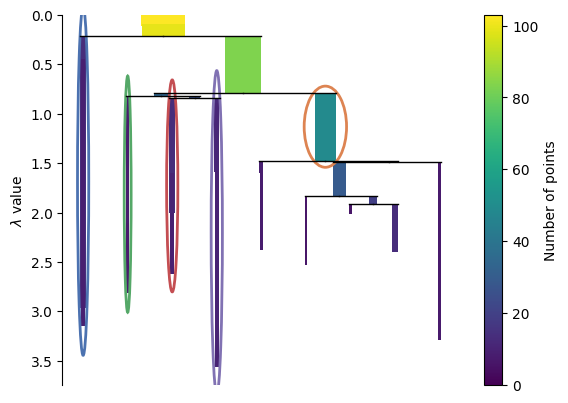

In [32]:
clusterer.condensed_tree_.plot(select_clusters=True,
                                  selection_palette=sns.color_palette('deep', 8)) # visualizacion de los  cluster

In [33]:
print(clusterer.cluster_persistence_)

[0.58612142 0.19217564 0.51982003 0.41666056 0.56313939]


In [34]:
#evaluacion del clustering
from sklearn.metrics import silhouette_score



silueta = silhouette_score(umap_transform, cluster_labels_hdbscan)

print("Coeficiente de silueta:", silueta)



Coeficiente de silueta: 0.5653111


# K-MEANS

In [35]:
from sklearn.cluster import KMeans

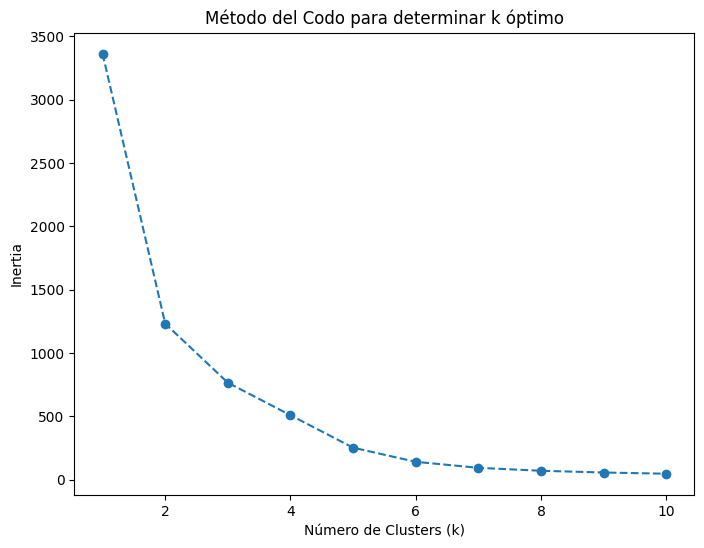

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Probar diferentes valores de k
inertia = []
k_values = range(1, 11)  # Probar de 1 a 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=2, n_init=10)
    kmeans.fit(umap_transform)
    inertia.append(kmeans.inertia_)  # Guardar la inercia

# Graficar el método del codo
plt.figure(figsize=(8,6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inertia")
plt.title("Método del Codo para determinar k óptimo")
plt.show()

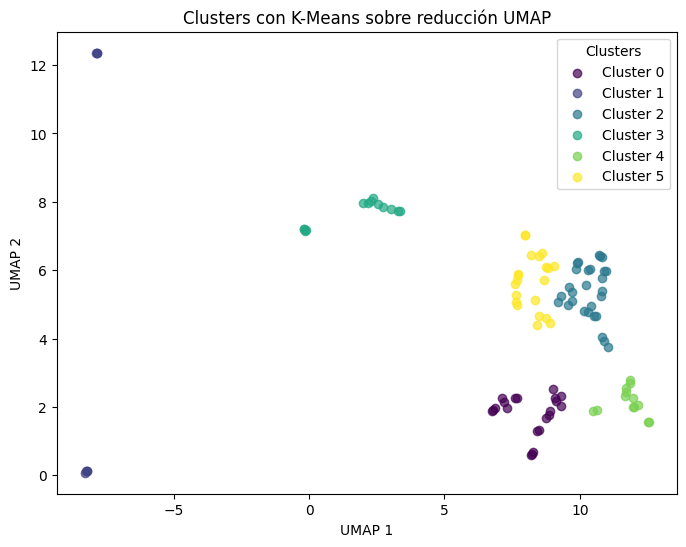

In [37]:
from sklearn.metrics import pairwise_distances
kmeans = KMeans(n_clusters=6, random_state=2, n_init=10)
distance_matrix = pairwise_distances(umap_transform, metric= 'euclidean')
clusters_labels_kmeans = kmeans.fit_predict(distance_matrix)


unique_clusters = np.unique(clusters_labels_kmeans)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))


plt.figure(figsize=(8, 6))
for cluster, color in zip(unique_clusters, colors):
    plt.scatter(umap_1[clusters_labels_kmeans == cluster], umap_2[clusters_labels_kmeans == cluster],
                color=color, label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("Clusters con K-Means sobre reducción UMAP")
plt.legend(title="Clusters")
plt.show()

# Asignacion
pasar del espacio UMAP al espacio original de los datos

In [38]:
df['cluster_hdbscan'] = cluster_labels_hdbscan
df['cluster_Kmeans'] = clusters_labels_kmeans
df.head()

,Unnamed: 0,id,viven_en_el_predio_de_caco,chum_2,chum_3,chum_5,cfis_1,cfis_2,cfis_3,cfis_4,...,L,Textura,Dr,Da,n,NDRE_Promedio,NDVI_Promedio,TEMP_Promedio,cluster_hdbscan,cluster_Kmeans
0,0,bar1,si,alto_,mano_de_obra_medianamente_calif,no,escriturado_,media,trocha,no,...,54.30,FL,2.30,1.41,38.73,0.41,0.85,31.80,1,2
1,1,bar2,no,alto_,mano_de_obra_medianamente_calif,no,escriturado_,media,trocha,no,...,26.83,FAr,2.39,1.25,47.70,0.42,0.86,28.97,1,2
2,2,bar3,no,medio,mano_de_obra_altamente_califica,no,carta_venta,media,trocha,no,...,24.20,FAr,2.36,1.27,46.19,0.16,0.50,33.45,3,0
3,3,bar4,no,bajo,mano_de_obra_medianamente_calif,no,no_reporta_ninguna_forma_legal_,alta,placa_huella_,no,...,30.30,Ar,2.38,1.15,51.68,0.18,0.55,35.59,1,2
4,4,bar5,no,alto_,mano_de_obra_medianamente_calif,no,no_reporta_ninguna_forma_legal_,media,trocha,no,...,22.30,FAr,2.46,1.33,45.93,0.24,0.47,32.44,1,2


# visualizacines preliminares

In [39]:
#definir las variables a analizar preliminares

vars_numericas = ['rph','fdta','ec','pH',]
vars_categoricas = ['vm']

In [40]:
# funcion para generar resumen por cluster

def resumen_cluster(df, filtro_col, valores_cluster, nombre_resultado):
    df_filtro = df[df[filtro_col].isin(valores_cluster)].copy()

    # Estadísticas numéricas
    resumen_num = df_filtro[vars_numericas].agg(['mean',  'count']).T
    resumen_num.columns = [f"{nombre_resultado}_mean", f"{nombre_resultado}_count"]
    resumen_num = resumen_num.round(2)

    # # Categóricas: moda
    # resumen_cat = {}
    # for var in vars_categoricas:
    #     moda = df_filtro[var].mode()
    #     resumen_cat[f'{nombre_resultado}_{var}_frecuente'] = moda[0] if not moda.empty else 'NA'

    # resumen_cat_df = pd.DataFrame(resumen_cat, index=[0]).T

    # Combinar todo
    return pd.concat([resumen_num], axis=0)



In [41]:
# Calcula resumen de HDBSCAN clúster 1
res_hdbscan_1 = resumen_cluster(df, 'cluster_hdbscan', [1], 'HDBSCAN_1')

# Calcula resumen de K-means clúster 2 y 5 por separado
res_kmeans_2 = resumen_cluster(df, 'cluster_Kmeans', [2], 'KMeans_2')
res_kmeans_5 = resumen_cluster(df, 'cluster_Kmeans', [5], 'KMeans_5')

# Combina en una tabla para comparación
tabla_caso_1 = pd.concat([res_hdbscan_1, res_kmeans_2, res_kmeans_5], axis=1)
tabla_caso_1_T = tabla_caso_1.T

# Visualiza
print("Comparación Clústeres - Caso 1")
display(tabla_caso_1_T)


Comparación Clústeres - Caso 1


,rph,fdta,ec,pH
HDBSCAN_1_mean,410.59,11.10,20.51,6.96
HDBSCAN_1_count,49.00,49.00,49.00,49.00
KMeans_2_mean,486.39,10.64,23.29,6.95
KMeans_2_count,28.00,28.00,28.00,28.00
KMeans_5_mean,309.52,11.71,16.81,6.97
KMeans_5_count,21.00,21.00,21.00,21.00


In [42]:
# Paso 1: Transponer el DataFrame original
tabla_caso1 = tabla_caso_1.T.copy()
tabla_caso1.index.name = 'cluster_variable'

# Paso 2: Separar el índice
tabla_caso1 = tabla_caso1.reset_index()
tabla_caso1[['cluster', 'stat']] = tabla_caso1['cluster_variable'].str.extract(r'(.+)_([^_]+)')

# Paso 3: Formato largo
df_long = tabla_caso1.drop(columns=['cluster_variable']).melt(
    id_vars=['cluster', 'stat'], var_name='variable', value_name='valor'
)

# Paso 4: Filtrar valores útiles
# Nos quedamos solo con 'mean' y una única 'count' por cluster
mean_df = df_long[df_long['stat'] == 'mean'].pivot(index='cluster', columns='variable', values='valor')
count_df = df_long[(df_long['stat'] == 'count') & (df_long['variable'] == 'rph')][['cluster', 'valor']]
count_df = count_df.rename(columns={'valor': 'count'}).set_index('cluster')

# Paso 5: Unir conteos + medias
tabla_resumida = pd.concat([count_df, mean_df], axis=1).reset_index()

# Mostrar tabla
tabla_resumida.head()


,cluster,count,ec,fdta,pH,rph
0,HDBSCAN_1,49.00,20.51,11.10,6.96,410.59
1,KMeans_2,28.00,23.29,10.64,6.95,486.39
2,KMeans_5,21.00,16.81,11.71,6.97,309.52


In [43]:
# ahora vamos a evaluar el caso 2
# Calcula resumen de HDBSCAN clúster 1
res_kmeans_0 = resumen_cluster(df, 'cluster_Kmeans', [0], 'KMeans_0')

# Calcula resumen de K-means clúster 2 y 5 por separado
res_hdbscan_2 = resumen_cluster(df, 'cluster_hdbscan', [2], 'Hdbscan_2')
res_hdbscan_3 = resumen_cluster(df, 'cluster_hdbscan', [3], 'Hdbscan_3')


# Combina en una tabla para comparación
tabla_caso_2 = pd.concat([res_kmeans_0, res_hdbscan_2, res_hdbscan_3], axis=1)
tabla_caso_2 = tabla_caso_2.T

# Visualiza
print("Comparación Clústeres - Caso 2")
display(tabla_caso_2.T)



Comparación Clústeres - Caso 2


,KMeans_0_mean,KMeans_0_count,Hdbscan_2_mean,Hdbscan_2_count,Hdbscan_3_mean,Hdbscan_3_count
rph,253.33,21.00,127.50,8.00,330.77,13.00
fdta,14.52,21.00,14.00,8.00,14.85,13.00
ec,37.14,21.00,59.62,8.00,23.31,13.00
pH,7.29,21.00,7.21,8.00,7.33,13.00


In [44]:
res_hdbscan_0= resumen_cluster(df, 'cluster_hdbscan', [0], 'HDBSCAN_0')
res_hdbscan_menos1 = resumen_cluster(df, 'cluster_hdbscan', [-1], 'HDBSCAN_-1')
res_hdbsacan_4 = resumen_cluster(df, 'cluster_hdbscan', [4], 'HDBSCAN_4')

tabla_caso_3 = pd.concat([res_hdbscan_0, res_hdbscan_menos1, res_hdbsacan_4 ], axis=1)
tabla_caso_3_T = tabla_caso_3.T


print("Comparación Clústeres - Caso 3")
display(tabla_caso_3_T)


tabla_caso3 = tabla_caso_3.T.copy()
tabla_caso3.index.name = 'cluster_variable'

tabla_caso3 = tabla_caso3.reset_index()
tabla_caso3[['cluster', 'stat']] = tabla_caso3['cluster_variable'].str.extract(r'(.+)_([^_]+)')

df_long_3 = tabla_caso3.drop(columns=['cluster_variable']).melt(
    id_vars=['cluster', 'stat'], var_name='variable', value_name='valor'
)


mean_df_3 = df_long_3[df_long_3['stat'] == 'mean'].pivot(index='cluster', columns='variable', values='valor')
count_df_3 = df_long_3[(df_long_3['stat'] == 'count') & (df_long_3['variable'] == 'rph')][['cluster', 'valor']]
count_df_3 = count_df_3.rename(columns={'valor': 'count'}).set_index('cluster')


tabla_resumida_3 = pd.concat([count_df_3, mean_df_3], axis=1).reset_index()

tabla_resumida_3.head()

Comparación Clústeres - Caso 3


,rph,fdta,ec,pH
HDBSCAN_0_mean,557.69,10.00,39.92,6.46
HDBSCAN_0_count,13.00,13.00,13.00,13.00
HDBSCAN_-1_mean,314.29,12.86,50.86,7.29
HDBSCAN_-1_count,7.00,7.00,7.00,7.00
HDBSCAN_4_mean,354.62,8.77,28.08,6.50
HDBSCAN_4_count,13.00,13.00,13.00,13.00


,cluster,count,ec,fdta,pH,rph
0,HDBSCAN_0,13.00,39.92,10.00,6.46,557.69
1,HDBSCAN_-1,7.00,50.86,12.86,7.29,314.29
2,HDBSCAN_4,13.00,28.08,8.77,6.50,354.62


In [45]:


# Crear columna separada para etiquetas de comparación caso 1
df['grupo_caso1_hdbscan'] = df['cluster_hdbscan'].apply(lambda x: 'HDBSCAN_1' if x == 1 else None)
df['grupo_caso1_kmeans'] = df['cluster_Kmeans'].apply(
    lambda x: 'KMeans_2' if x == 2 else ('KMeans_5' if x == 5 else None)
)

# Unir en un solo DataFrame los registros etiquetados por ambos algoritmos
df_caso1 = pd.concat([
    df[df['grupo_caso1_hdbscan'].notnull()].assign(grupo_caso1='HDBSCAN_1'),
    df[df['grupo_caso1_kmeans'].isin(['KMeans_2', 'KMeans_5'])].assign(grupo_caso1=df['grupo_caso1_kmeans'])
])




In [46]:

tabla_frecuencia_variedades = df_caso1.groupby(['grupo_caso1', 'vm']).size().unstack(fill_value=0)


In [47]:
print(tabla_frecuencia_variedades)



vm           CCN-51  FEAR-5  ICS-95  clon  criollo  hibrido  other
grupo_caso1                                                       
HDBSCAN_1         6       1       1    12        5       22      2
KMeans_2          5       1       1     3        1       15      2
KMeans_5          1       0       0     9        4        7      0


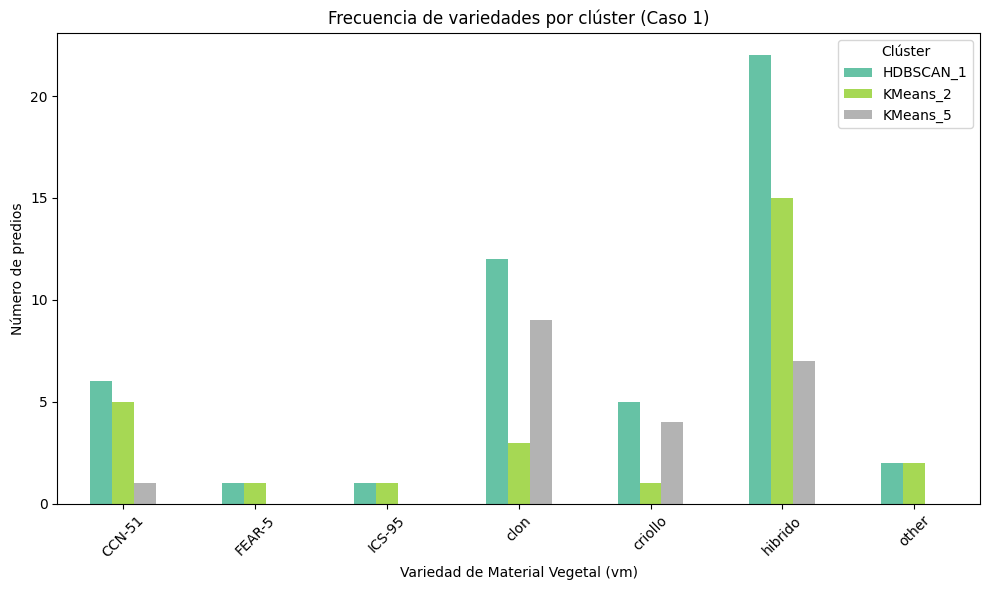

In [48]:
tabla_frecuencia_variedades.T.plot(
    kind='bar',
    figsize=(10, 6),
    colormap='Set2'
)

plt.title("Frecuencia de variedades por clúster (Caso 1)")
plt.xlabel("Variedad de Material Vegetal (vm)")
plt.ylabel("Número de predios")
plt.xticks(rotation=45)
plt.legend(title="Clúster")
plt.tight_layout()
plt.show()

In [49]:
(df['cluster_Kmeans']==5).sum()


np.int64(21)

In [50]:
# Crear columna separada para etiquetas de comparación caso 1
df['grupo_caso1_hdbscan'] = df['cluster_hdbscan'].apply(lambda x: 'HDBSCAN_1' if x == 1 else None)
df['grupo_caso1_kmeans'] = df['cluster_Kmeans'].apply(
    lambda x: 'KMeans_2' if x == 2 else ('KMeans_5' if x == 5 else None)
)

# Unir en un solo DataFrame los registros etiquetados por ambos algoritmos
df_caso1 = pd.concat([
    df[df['grupo_caso1_hdbscan'].notnull()].assign(grupo_caso1='HDBSCAN_1'),
    df[df['grupo_caso1_kmeans'].isin(['KMeans_2', 'KMeans_5'])].assign(grupo_caso1=df['grupo_caso1_kmeans'])
])

tabla_frecuencia_variedades = df_caso1.groupby(['grupo_caso1', 'vm']).size().unstack(fill_value=0)

print(tabla_frecuencia_variedades)



vm           CCN-51  FEAR-5  ICS-95  clon  criollo  hibrido  other
grupo_caso1                                                       
HDBSCAN_1         6       1       1    12        5       22      2
KMeans_2          5       1       1     3        1       15      2
KMeans_5          1       0       0     9        4        7      0


In [51]:
df['grupos_equivalentes'] = df['cluster_hdbscan'].apply(
    lambda x: '-1' if x == -1 else
              '0' if x == 0 else
              '1' if x == 1 else
              '2' if x == 2 else
              '3' if x == 3 else
              '4' if x == 4 else None
)

tabla_frecuencia_variedades2 = df.groupby(['grupos_equivalentes', 'vm']).size().unstack(fill_value=0)
print(tabla_frecuencia_variedades2)
#print(tabla_frecuencia_variedades)



vm                   CCN-51  FEAR-5  ICS-39  ICS-95  clon  criollo  hibrido  \
grupos_equivalentes                                                           
-1                        3       0       0       0     0        0        4   
0                         0       0       0       0     1        9        3   
1                         6       1       0       1    12        5       22   
2                         0       0       0       0     1        1        5   
3                         0       0       0       0     1        1       10   
4                         3       0       1       0     1        2        6   

vm                   other  trinitario  
grupos_equivalentes                     
-1                       0           0  
0                        0           0  
1                        2           0  
2                        0           1  
3                        1           0  
4                        0           0  


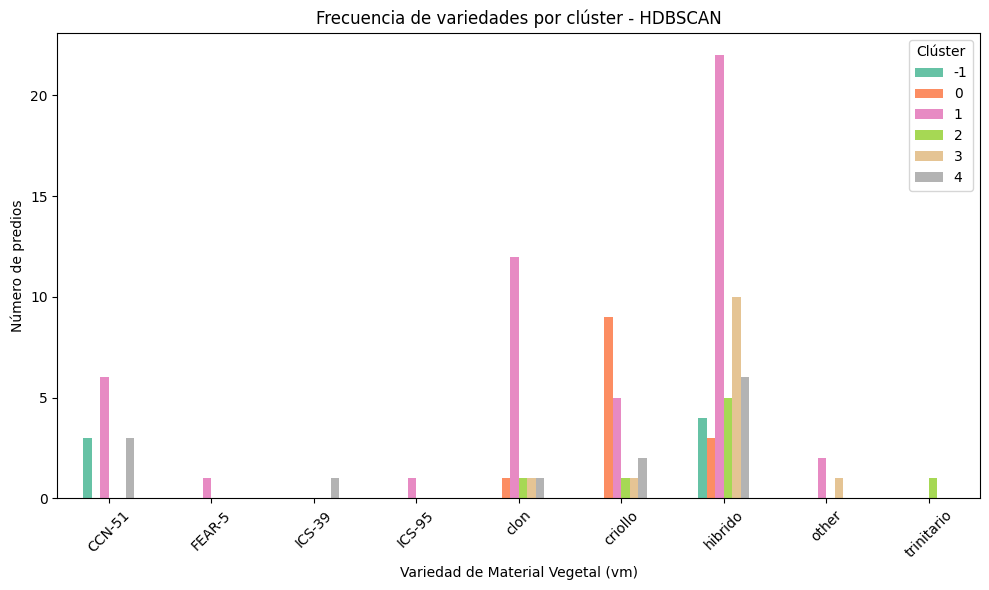

In [52]:
tabla_frecuencia_variedades2.T.plot(
    kind='bar',
    figsize=(10, 6),
    colormap='Set2'
)

plt.title("Frecuencia de variedades por clúster - HDBSCAN")
plt.xlabel("Variedad de Material Vegetal (vm)")
plt.ylabel("Número de predios")
plt.xticks(rotation=45)
plt.legend(title="Clúster")
plt.tight_layout()
plt.show()

In [54]:


tabla_frecuencia_clasesTexturales = df.groupby(['grupos_equivalentes', 'Textura']).size().unstack(fill_value=0)
print(tabla_frecuencia_clasesTexturales)



Textura              A  AF  Ar  ArA  F  FA  FAr  FArA  FArL  FL
grupos_equivalentes                                            
-1                   0   0   0    0  1   0    1     5     0   0
0                    0   0   0    0  1   8    3     1     0   0
1                    1   1   2    1  4   7   12    19     0   2
2                    0   0   3    0  1   0    1     2     1   0
3                    0   0   0    0  0   3    2     8     0   0
4                    0   0   7    0  0   1    4     1     0   0


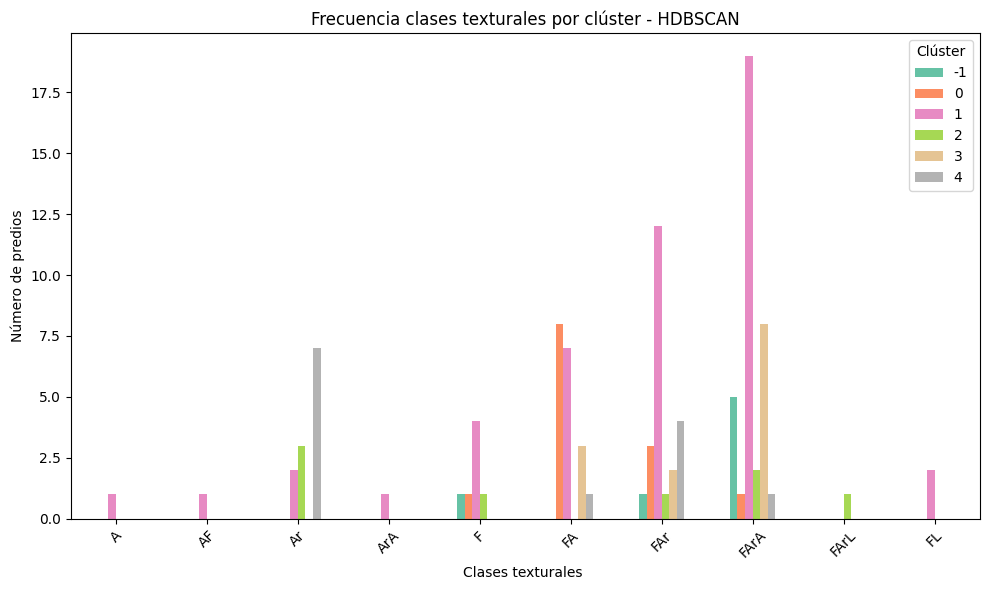

In [55]:
tabla_frecuencia_clasesTexturales.T.plot(
    kind='bar',
    figsize=(10, 6),
    colormap='Set2'
)

plt.title("Frecuencia clases texturales por clúster - HDBSCAN")
plt.xlabel("Clases texturales ")
plt.ylabel("Número de predios")
plt.xticks(rotation=45)
plt.legend(title="Clúster")
plt.tight_layout()
plt.show()

In [56]:
#financiero

tabla_frecuencia_financiero = df.groupby(['grupos_equivalentes', 'cfin_2']).size().unstack(fill_value=0)
print(tabla_frecuencia_financiero)


cfin_2               1_a_2_smlv  mas_de_5_smlv  menos_1_smlv
grupos_equivalentes                                         
-1                            0              0             7
0                             9              0             4
1                             4              2            43
2                             0              0             8
3                             0              0            13
4                             0              0            13


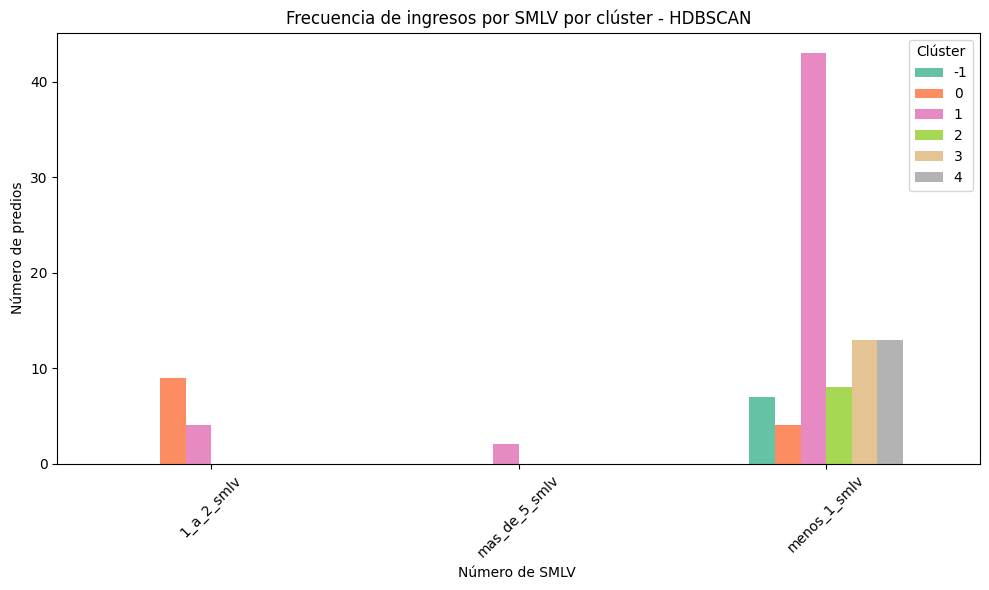

In [57]:
tabla_frecuencia_financiero.T.plot(
    kind='bar',
    figsize=(10, 6),
    colormap='Set2'
)

plt.title("Frecuencia de ingresos por SMLV por clúster - HDBSCAN")
plt.xlabel("Número de SMLV ")
plt.ylabel("Número de predios")
plt.xticks(rotation=45)
plt.legend(title="Clúster")
plt.tight_layout()
plt.show()

######


#Estadisticas Descriptivas

In [59]:
#df.to_csv('df_clusterHDBSCAN_KMEANS.csv')

#--------------------------------------------------------------

# funcion resumen estadisticos -> box plot


In [61]:
#--------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------
def quantile(df,X):
  sns.boxplot(data=df, x=X, showmeans = True)
  Q1 = X.quantile(0.25)
  Q2 = X.quantile(0.5)
  Q3 = X.quantile(0.75)
  range = Q3-Q1
  Minimo = X.min()
  Maximo = X.max()
  media = X.mean()
  mediana = X.median()

  print('Q1 = ', '{:.2f}'.format(Q1))
  print('Q2 = ', '{:.2f}'.format(Q2))
  print('Q3 = ', '{:.2f}'.format(Q3))
  print('Rango = ', '{:.2f}'.format(range))
  print('Valor Minimo = ', '{:.2f}'.format(Minimo))
  print('Valor Maximo = ', '{:.2f}'.format(Maximo))
  print('media = ', '{:.2f}'.format(media))
  print('mediana = ', '{:.2f}'.format(mediana))

#funcion graficos  -> frecuencias

In [62]:
def freq(df,x, valor):
  valores = valor
  conteos = [df[x].value_counts().get(valor, 0) for valor in valores]

# Crear el gráfico de barras
  plt.bar(valores, conteos)

# Agregar etiquetas y título
  plt.xlabel('Valor')
  plt.ylabel('Frecuencia')
  plt.title('Frecuencia de valores en cluster[x]')

# Mostrar el gráfico
  plt.show()
#-----------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------

############################################################

# Asignacion por cluster

In [65]:
cluster_menos1=df[df['cluster_hdbscan']==-1]
cluster_0=df[df['cluster_hdbscan']==0]
cluster_1=df[df['cluster_hdbscan']==1]
cluster_2=df[df['cluster_hdbscan']==2]
cluster_3=df[df['cluster_hdbscan']==3]
cluster_4=df[df['cluster_hdbscan']==4]



In [66]:
import folium

In [68]:


# Definir colores para cada clúster
colores = ['red', 'blue', 'green', 'purple', 'orange', 'darkblue']

# Crear el mapa centrado en la ubicación promedio
mapa = folium.Map(
    location=[df['y'].mean(), df['x'].mean()],
    zoom_start=6,
    tiles="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}",
    attr="Esri"
)

# Agregar los puntos de cada clúster con diferentes colores
for i in range(6):  # Suponiendo que hay 6 clústeres (0 a 5)
    cluster = df[df['cluster_hdbscan'] == i]  # Filtrar por clúster
    for idx, row in cluster.iterrows():
        folium.Marker(
            location=[row['y'], row['x']],
            popup=f'Punto {idx} - Cluster {i}',
            icon=folium.Icon(color=colores[i], icon="info-sign")
        ).add_to(mapa)

# Agregar control de capas para cambiar entre mapas base
folium.LayerControl().add_to(mapa)

# Mostrar el mapa
mapa


------------------------------------------------------------------------
#Manejo Agronomico

# cluster 0

Q1 =  200.00
Q2 =  200.00
Q3 =  800.00
Rango =  600.00
Valor Minimo =  50.00
Valor Maximo =  2800.00
media =  557.69
mediana =  200.00


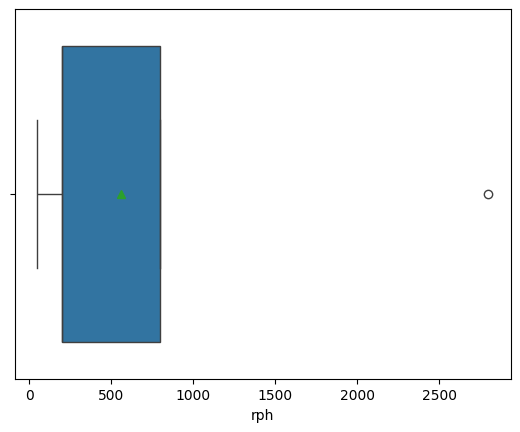

In [70]:
#rph cluster 0 (RENDIMIENTO POR HECTAREA MEDIDA EN Kg al año)
quantile(cluster_0, cluster_0.rph)#resumen de los 5 estadisticos descriptivos principales visualizados en un diagrama boxplot

Q1 =  32.00
Q2 =  50.00
Q3 =  50.00
Rango =  18.00
Valor Minimo =  3.00
Valor Maximo =  60.00
media =  39.92
mediana =  50.00


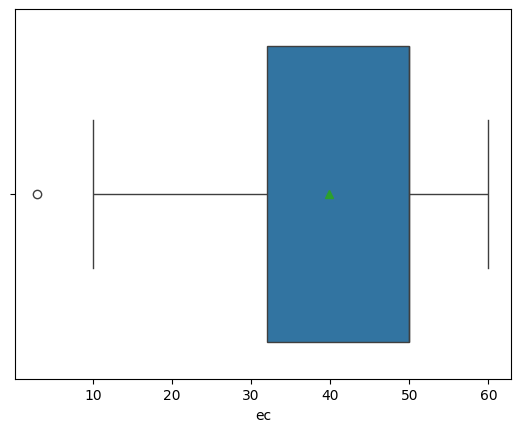

In [71]:
# edad del clutivo en años
quantile(cluster_0, cluster_0.ec)

Q1 =  8.00
Q2 =  8.00
Q3 =  15.00
Rango =  7.00
Valor Minimo =  2.00
Valor Maximo =  30.00
media =  10.00
mediana =  8.00


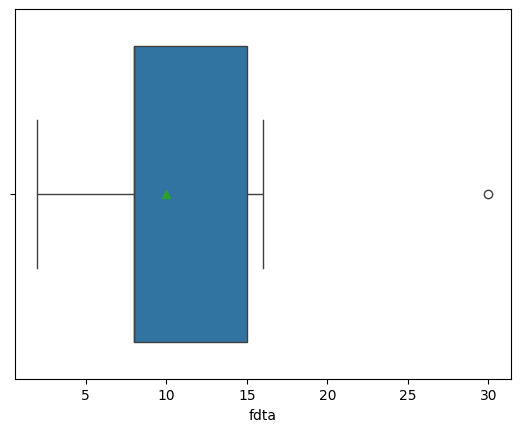

In [72]:
#frecuencia de asigancion de asignacion de turnos para riego medido en dias
quantile(cluster_0, cluster_0.fdta)

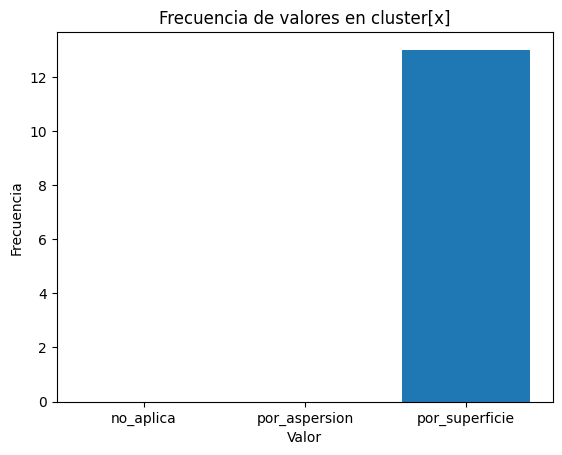

In [73]:
# tipos de sistemas de riego cluster 0
freq(cluster_0, 'tsr',['no_aplica', 'por_aspersion', 'por_superficie'] )


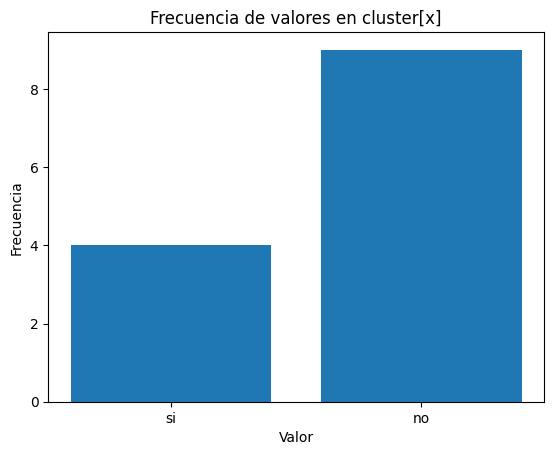

In [74]:
#aplica fertelizante
freq(cluster_0, 'af',['si', 'no'] )

In [75]:
# frecuancias absolutas del numero de unidades productivas que aplican fertilizante
pd.crosstab(cluster_0['af'], columns='counts')

col_0,counts
af,
no,9
si,4


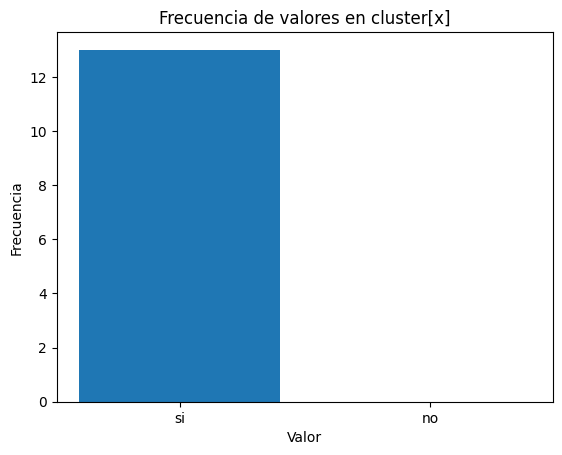

In [76]:
#Presencia de plagas en las unidades productivas
freq(cluster_0, 'ppla',['si', 'no'] )

In [77]:
# frecuancias absolutas del numero de unidades productivas que presentan plagas
pd.crosstab(cluster_0['ppla'], columns='counts')

col_0,counts
ppla,
si,13


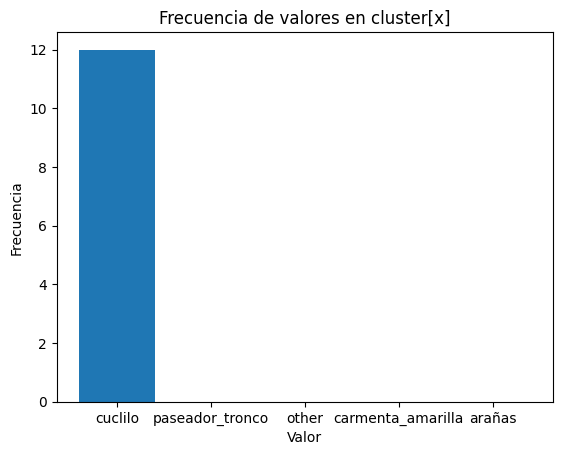

In [78]:
#tipo de plaga principal
freq(cluster_0, 'tplam',['cuclilo', 'paseador_tronco', 'other', 'carmenta_amarilla',
       'arañas'] )

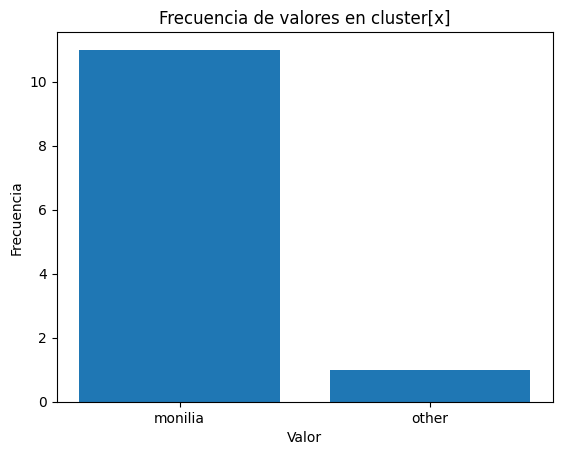

In [79]:
##enfermedad principal
freq(cluster_0, 'tenfm',['monilia', 'other'] )

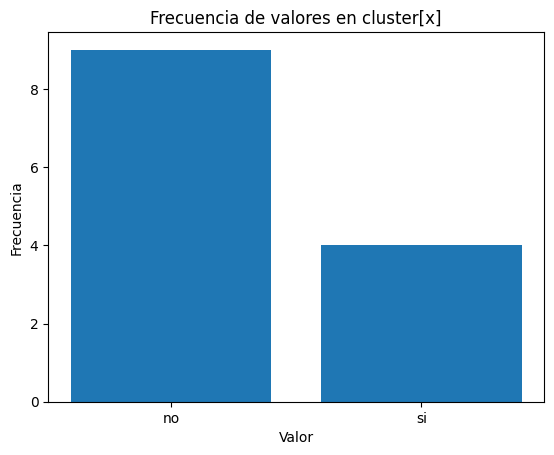

In [80]:
#aplican fungicidas
freq(cluster_0, 'afun',['no', 'si'])

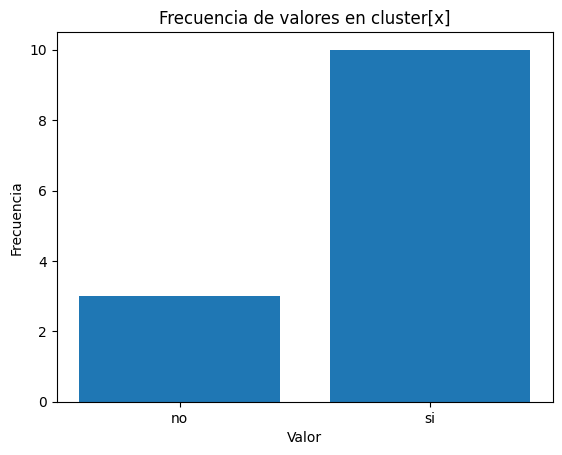

In [81]:
#aplican plagicidas
freq(cluster_0, 'apla',['no', 'si'])

------------------------------------------------------------------------
#Actividades de Postcosecha

In [82]:
#frecuencia absoluta del tipo de postcosecha realizada
pd.crosstab(cluster_0['pstc_1'], columns='counts')

col_0,counts
pstc_1,
extraccion_del_grano,13


In [83]:
#frecuencia absoluta del tipo de infraestructura para la  postcosecha
pd.crosstab(cluster_0['pstc_2'], columns='counts')

col_0,counts
pstc_2,
cajon_de_fermentacion,13


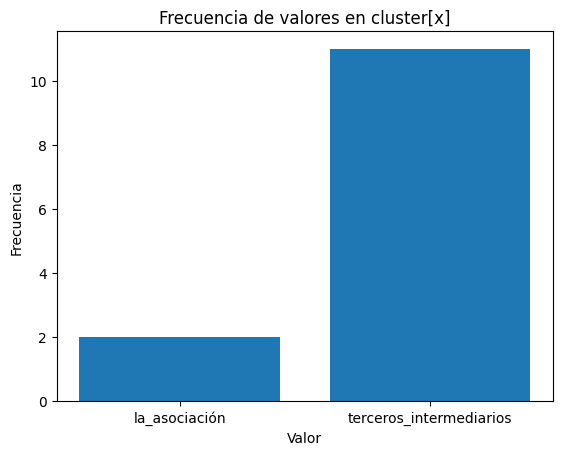

In [84]:
##frecuencia absoluta de la plataforma donde se relaiza la venta de cacao
freq(cluster_0, 'pstc_4',['la_asociación', 'terceros_intermediarios'])

--------------------------------------------------------------------------------
#Capital Natural

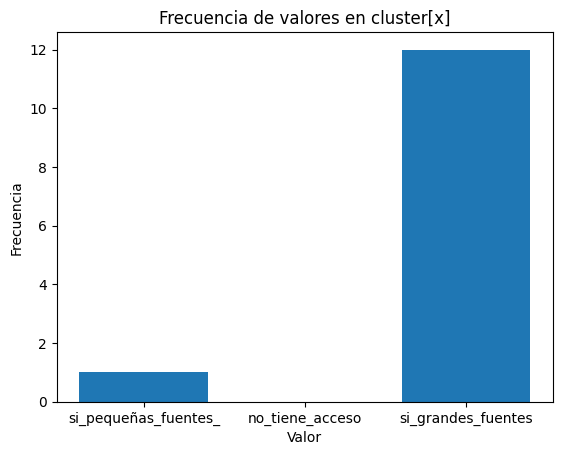

In [85]:
# acceso a fuentes naturales de agua de buena calidad
freq(cluster_0, 'cnat_1',['si_pequeñas_fuentes_', 'no_tiene_acceso', 'si_grandes_fuentes'] )

-----------------------------------------------------------------
#variedad
materiales de cacao presentes en el cluster 0

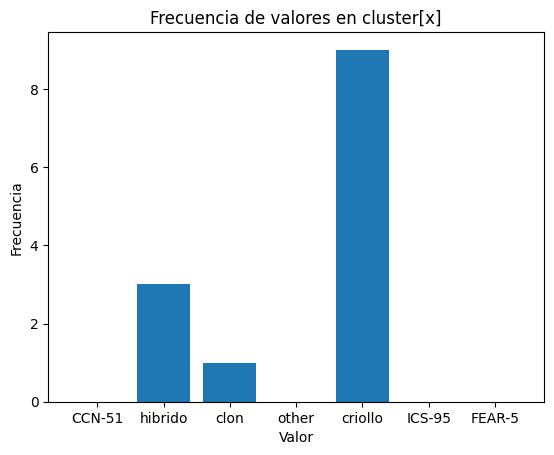

In [86]:
freq(cluster_0, 'vm',['CCN-51', 'hibrido', 'clon', 'other', 'criollo', 'ICS-95',
       'FEAR-5'])

--------------------------------------------------------------------
# Fisica de suelos
Analisis de las variables de los resultados de fisica de suelo pertenecientes al CLUSTER 0.

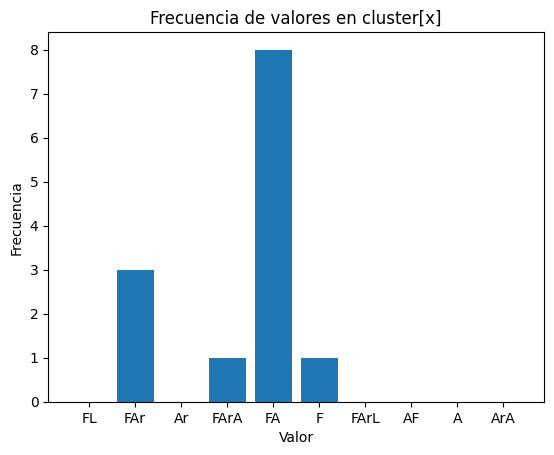

In [87]:
#clases texturales
freq(cluster_0, 'Textura',['FL', 'FAr', 'Ar', 'FArA', 'FA', 'F', 'FArL', 'AF', 'A', 'ArA'])

In [88]:
pd.crosstab(cluster_0['Textura'], columns='counts')#tabla de frecuencias de las clases texturales en el cluster 0

col_0,counts
Textura,
F,1
FA,8
FAr,3
FArA,1


Q1 =  6.21
Q2 =  6.36
Q3 =  7.09
Rango =  0.88
Valor Minimo =  5.21
Valor Maximo =  7.18
media =  6.46
mediana =  6.36


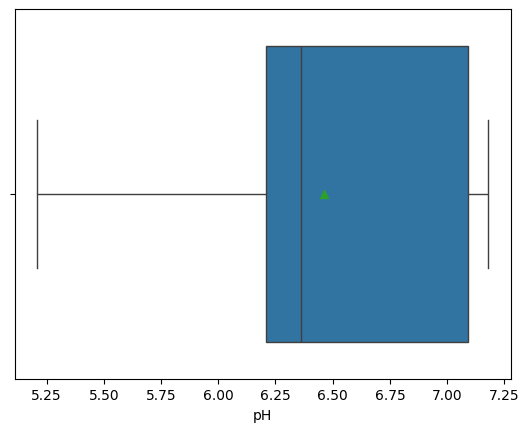

In [89]:
#pH
quantile(cluster_0, cluster_0.pH)

Q1 =  0.06
Q2 =  0.09
Q3 =  0.17
Rango =  0.10
Valor Minimo =  0.05
Valor Maximo =  0.34
media =  0.13
mediana =  0.09


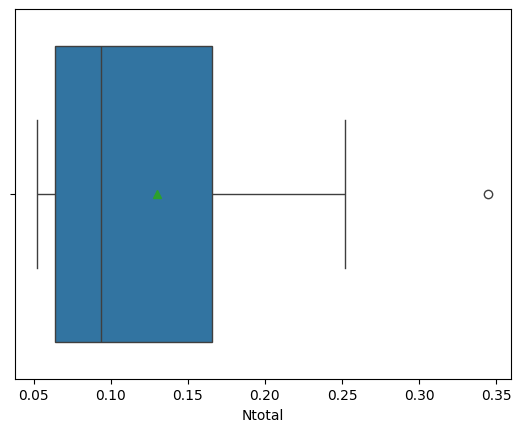

In [90]:
#nitrogeno total
quantile(cluster_0, cluster_0.Ntotal)

Q1 =  1.45
Q2 =  1.51
Q3 =  1.59
Rango =  0.14
Valor Minimo =  1.28
Valor Maximo =  1.65
media =  1.49
mediana =  1.51


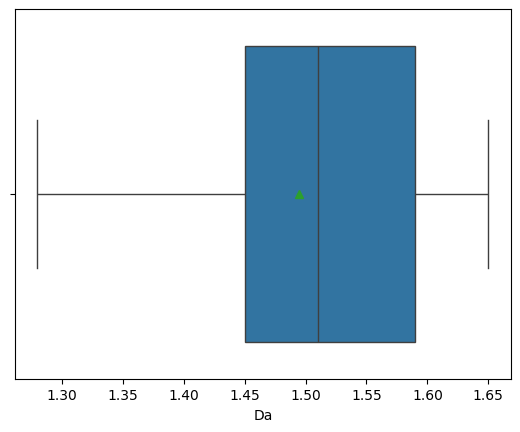

In [91]:
#densidad aparente
quantile(cluster_0, cluster_0.Da)

-----------------------------------------------------
#Capital financiero

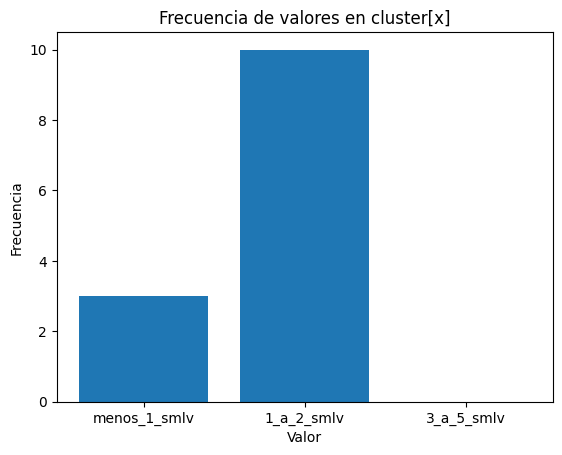

In [92]:
#valor estimado de todos los ingresos mensuales del nucleo familiar
freq(cluster_0,'cfin_1',['menos_1_smlv', '1_a_2_smlv', '3_a_5_smlv'])

In [93]:
# frecuancias absolutas de el valor estimado de todos los ingresos mensuales del nucleo familiar
pd.crosstab(cluster_0['cfin_1'], columns='counts')

col_0,counts
cfin_1,
1_a_2_smlv,10
menos_1_smlv,3


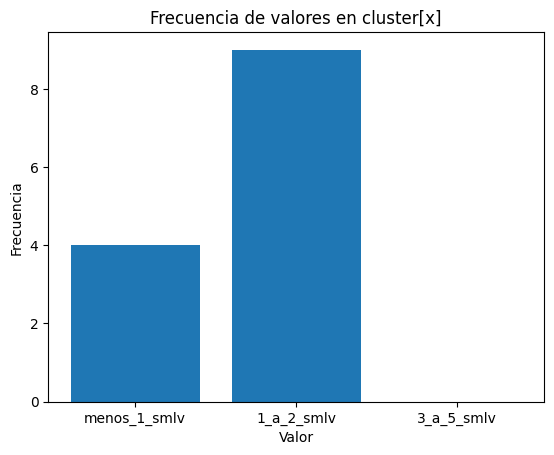

In [94]:
#ingresos solo de la produccion de cacao
freq(cluster_0,'cfin_2',['menos_1_smlv', '1_a_2_smlv', '3_a_5_smlv'])

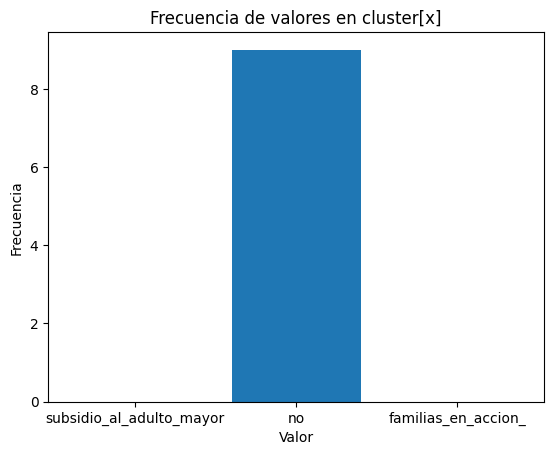

In [95]:
#subsidios recibidos por parte del estado
freq(cluster_0,'cfin_6',['subsidio_al_adulto_mayor', 'no', 'familias_en_accion_'])

In [96]:
# frecuancias absolutas de unidades productivas que reciben subsidios por parte del estado
pd.crosstab(cluster_0['cfin_6'], columns='counts')

col_0,counts
cfin_6,
ingreso_solidario,4
no,9


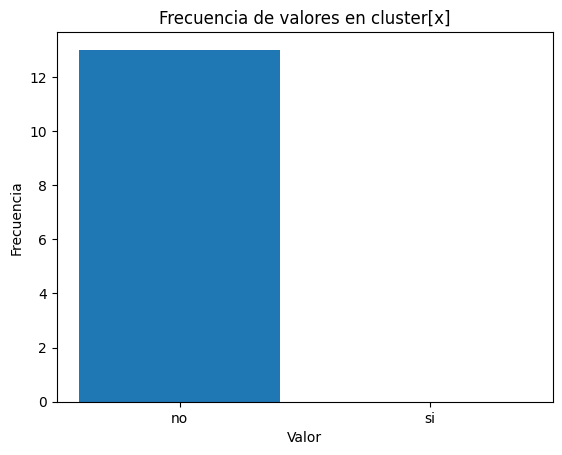

In [97]:
#Diagrama de barra  de unidades productivas que reciben subsidios por parte del estado
freq(cluster_0,'cfin_7',['no', 'si'])

In [98]:
# frecuancias absolutas de unidades productivas que reciben subsidios por parte de la actividad en cacao
pd.crosstab(cluster_0['cfin_7'], columns='counts')

col_0,counts
cfin_7,
no,13


--------------------------------------------------------------------------------
#Capital Social

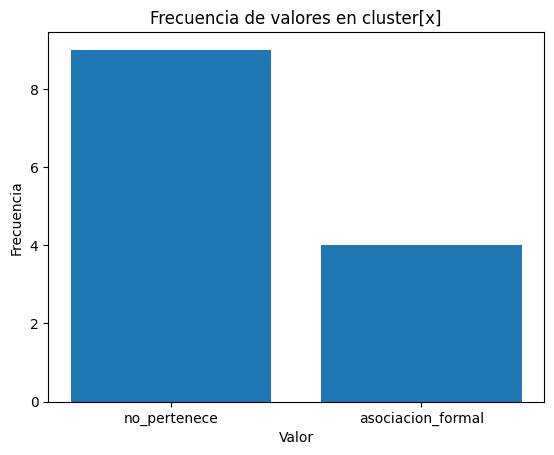

In [99]:
#pertenece a algun grupo asociativo de cacao
freq(cluster_0,'csoc_1',['no_pertenece', 'asociacion_formal'])

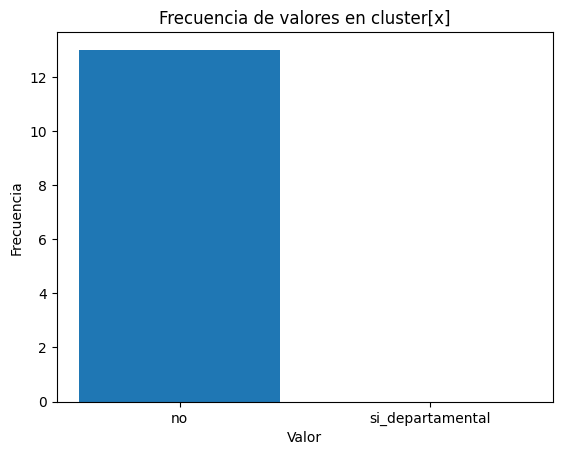

In [100]:
# reciben algun tipo de ayuda economica, asesoria, asitencia tecnica por el estado
freq(cluster_0,'csoc_4',['no', 'si_departamental'])

In [101]:
# frecuancias absolutas de unidades productivas que han recibido ayuda economica, asistencia tecninca por parte del estado.
pd.crosstab(cluster_0['csoc_4'], columns='counts')

col_0,counts
csoc_4,
no,13


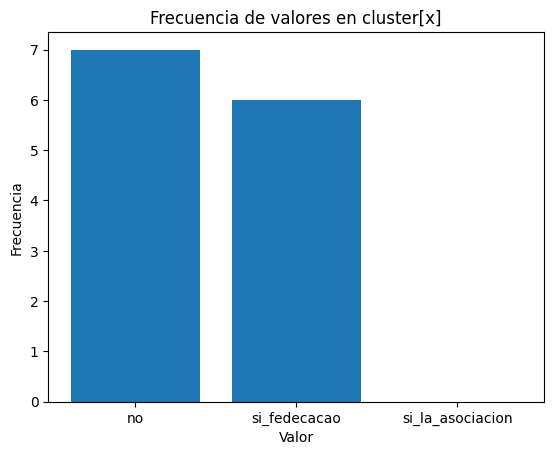

In [102]:
#ayuda economica o asistensia tecnica por otras instituciones
freq(cluster_0,'csoc_5',['no', 'si_fedecacao', 'si_la_asociacion'])

In [103]:
# frecuancias absolutas de unidades productivas que han recibido ayuda economica, asistencia tecninca por otras instituciones.
pd.crosstab(cluster_0['csoc_5'], columns='counts')

col_0,counts
csoc_5,
no,7
si_fedecacao,6


##########################################################################################



#cluster 1


------------------------------------------------------------------------
#Manejo Agronomico

Q1 =  200.00
Q2 =  300.00
Q3 =  500.00
Rango =  300.00
Valor Minimo =  0.00
Valor Maximo =  3000.00
media =  410.59
mediana =  300.00


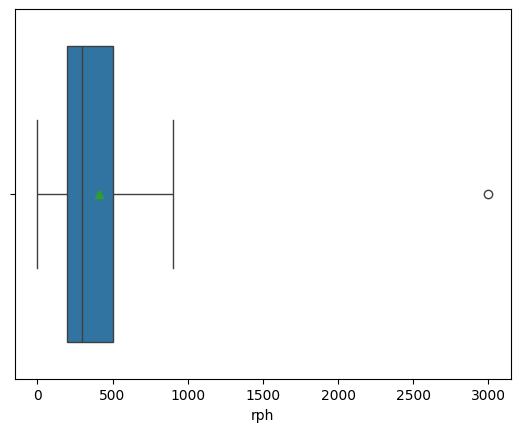

In [105]:
#rph cluster 1 (RENDIMIENTO POR HECTAREA MEDIDA EN Kg al año)
quantile(cluster_1, cluster_1.rph)

Q1 =  12.00
Q2 =  16.00
Q3 =  25.00
Rango =  13.00
Valor Minimo =  2.00
Valor Maximo =  70.00
media =  20.51
mediana =  16.00


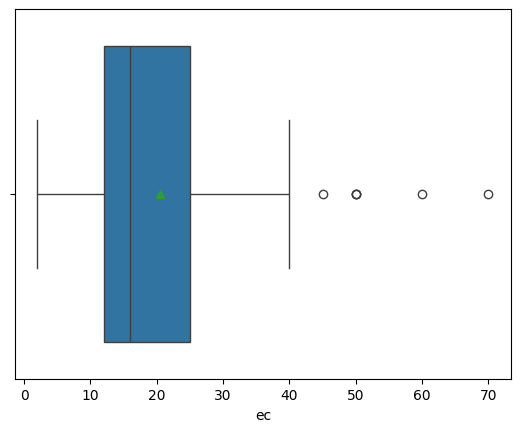

In [106]:
# edad del clutivo en años
quantile(cluster_1, cluster_1.ec)

Q1 =  8.00
Q2 =  8.00
Q3 =  15.00
Rango =  7.00
Valor Minimo =  0.00
Valor Maximo =  30.00
media =  11.10
mediana =  8.00


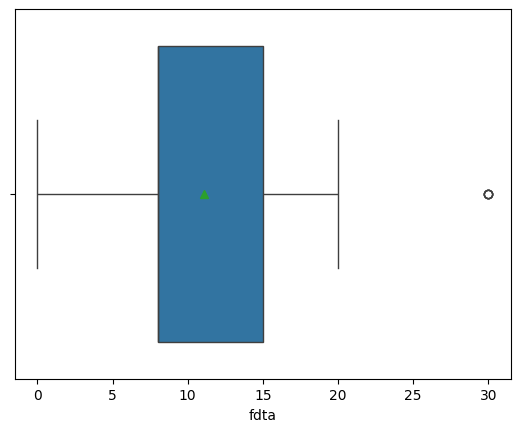

In [107]:
#frecuencia de asigancion de asignacion de turnos para riego medido en dias
quantile(cluster_1, cluster_1.fdta)

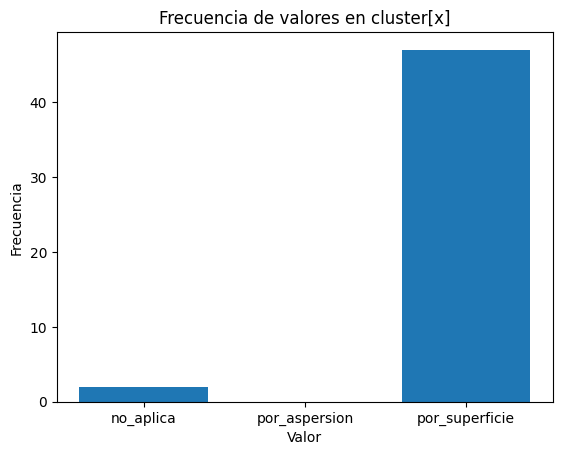

In [108]:
# tipos de sistemas de riego cluster 1
freq(cluster_1, 'tsr',['no_aplica', 'por_aspersion', 'por_superficie'] )

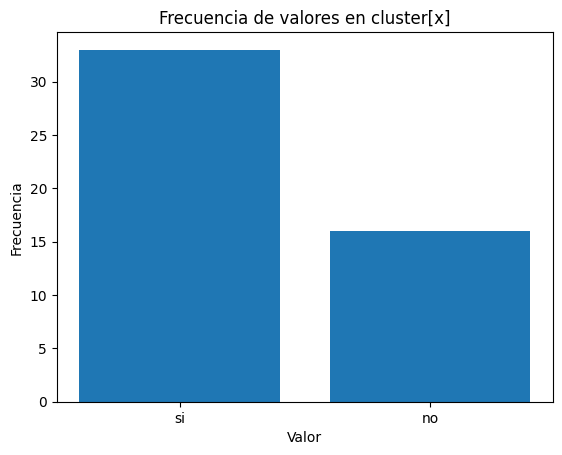

In [109]:
#aplica fertelizante
freq(cluster_1, 'af',['si', 'no'] )

In [110]:
# frecuancias absolutas del numero de unidades productivas que aplican fertilizante
pd.crosstab(cluster_1['af'], columns='counts')


col_0,counts
af,
no,16
si,33


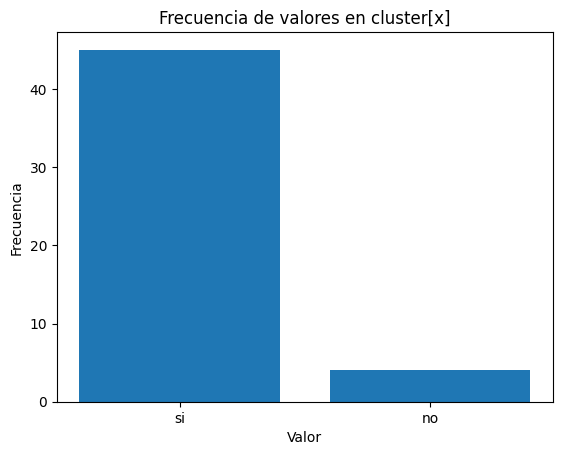

In [111]:
#Presencia de plagas en las unidades productivas
freq(cluster_1, 'ppla',['si', 'no'] )


In [112]:
# frecuancias absolutas del numero de unidades productivas que presentan plagas
pd.crosstab(cluster_1['ppla'], columns='counts')

col_0,counts
ppla,
no,4
si,45


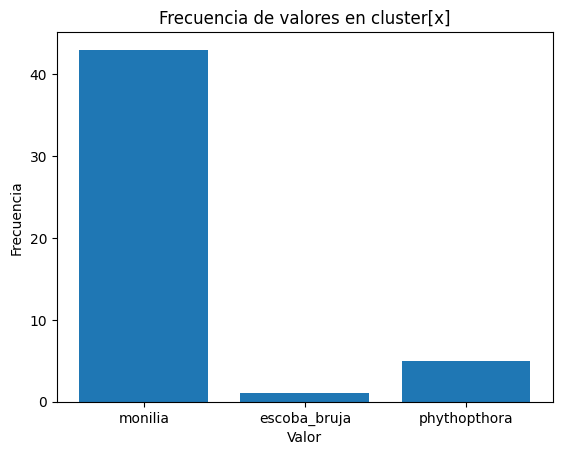

In [113]:
##enfermedad principal
freq(cluster_1, 'tenfm',['monilia', 'escoba_bruja', 'phythopthora'] )

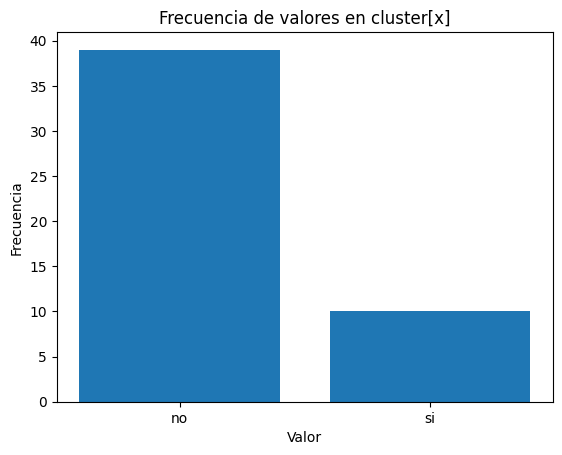

In [114]:

#aplican fungicidas
freq(cluster_1, 'afun',['no', 'si'])

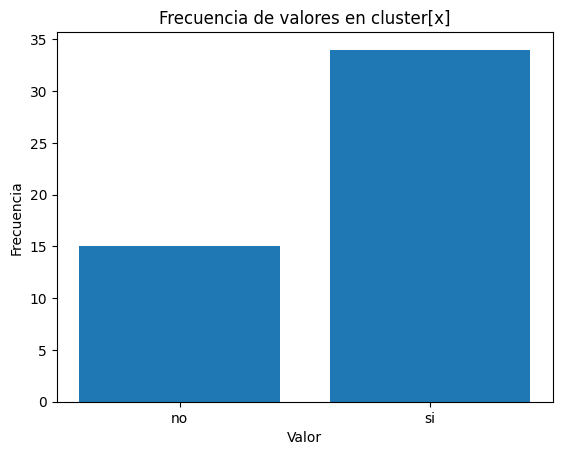

In [115]:
#aplican plagicidas
freq(cluster_1, 'apla',['no', 'si'])


------------------------------------------------------------------------
#Actividades de Postcosecha

In [116]:
#frecuencia absoluta del tipo de postcosecha realizada
pd.crosstab(cluster_1['pstc_1'], columns='counts')

col_0,counts
pstc_1,
beneficio_del_gran,3
extraccion_del_grano,46


In [117]:
#frecuencia absoluta del tipo de infraestructura para la  postcosecha
pd.crosstab(cluster_1['pstc_2'], columns='counts')


col_0,counts
pstc_2,
"bandejas_para_secad,cajon_de_fermentacion",1
beneficiadero_propio,1
cajon_de_fermentacion,24
"cajon_de_fermentacion,bandejas_para_secad",8
"cajon_de_fermentacion,beneficiadero_propio",1
other,14


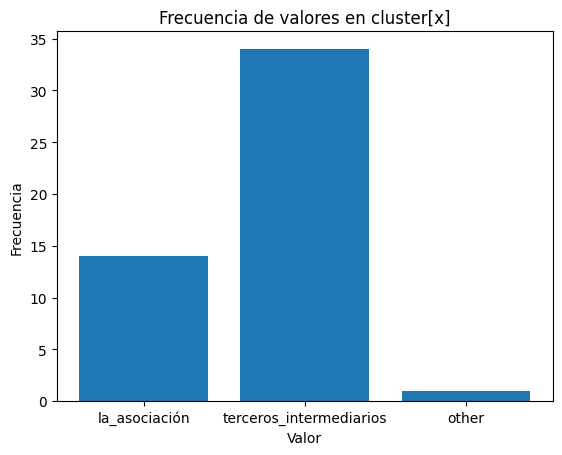

In [118]:
##frecuencia absoluta de la plataforma donde se relaiza la venta de cacao
freq(cluster_1, 'pstc_4',['la_asociación', 'terceros_intermediarios', 'other'])

--------------------------------------------------------------------------------
#Capital Natural

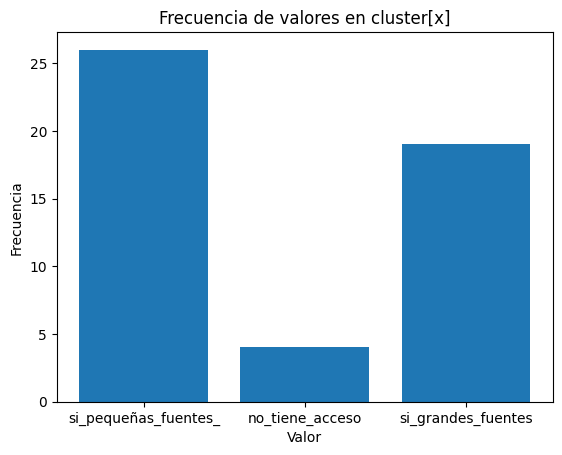

In [119]:
freq(cluster_1, 'cnat_1',['si_pequeñas_fuentes_', 'no_tiene_acceso', 'si_grandes_fuentes'] )

-----------------------------------------------------------
#variedad


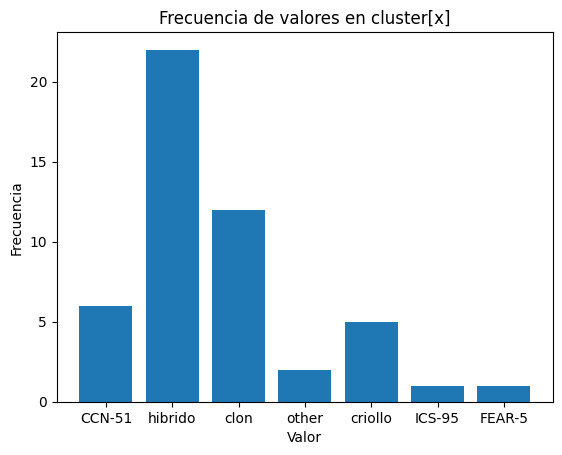

In [120]:
freq(cluster_1, 'vm',['CCN-51', 'hibrido', 'clon', 'other', 'criollo', 'ICS-95',
       'FEAR-5'])

------------------------------------------------------------
#Fisica de suelos
.

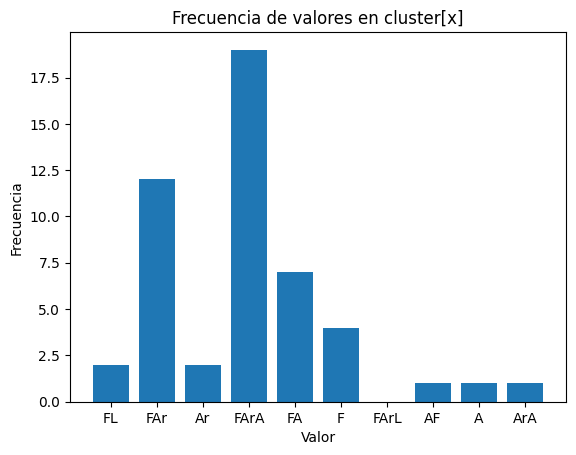

In [121]:
#clases texturales
freq(cluster_1, 'Textura',['FL', 'FAr', 'Ar', 'FArA', 'FA', 'F', 'FArL', 'AF', 'A', 'ArA'])

In [122]:
pd.crosstab(cluster_1['Textura'], columns='counts')#tabla de frecuencias de las clases texturales en el cluster 1

col_0,counts
Textura,
A,1
AF,1
Ar,2
ArA,1
F,4
FA,7
FAr,12
FArA,19
FL,2


Q1 =  6.56
Q2 =  7.16
Q3 =  7.43
Rango =  0.87
Valor Minimo =  5.70
Valor Maximo =  7.63
media =  6.96
mediana =  7.16


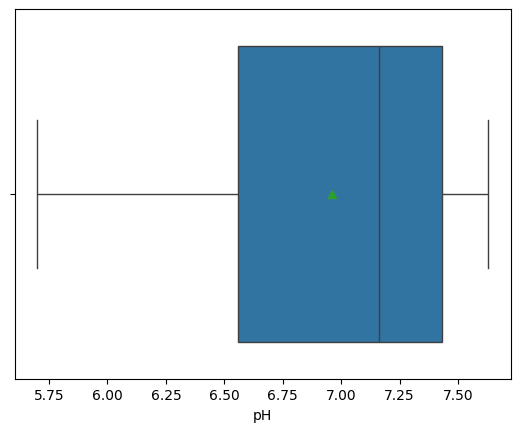

In [123]:
#pH
quantile(cluster_1, cluster_1.pH)


Q1 =  0.06
Q2 =  0.08
Q3 =  0.11
Rango =  0.05
Valor Minimo =  0.01
Valor Maximo =  0.20
media =  0.09
mediana =  0.08


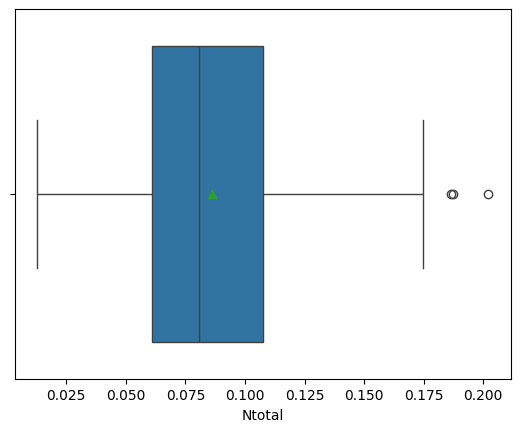

In [124]:
#nitrogeno total
quantile(cluster_1, cluster_1.Ntotal)

Q1 =  1.37
Q2 =  1.45
Q3 =  1.50
Rango =  0.13
Valor Minimo =  1.15
Valor Maximo =  1.65
media =  1.43
mediana =  1.45


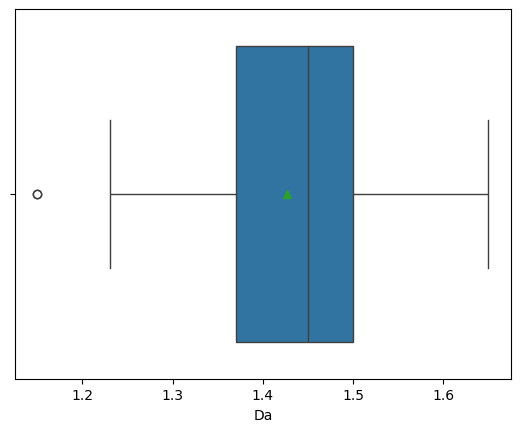

In [125]:
#densidad aparente
quantile(cluster_1, cluster_1.Da)

-----------------------------------------------------
#Capital financiero

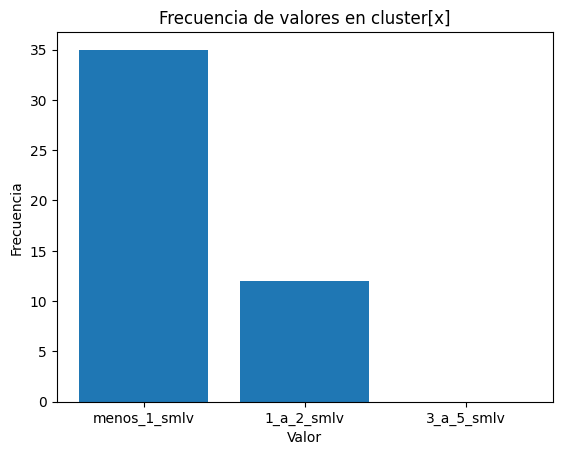

In [126]:
#valor estimado de todos los ingresos mensuales del nucleo familiar
freq(cluster_1,'cfin_1',['menos_1_smlv', '1_a_2_smlv', '3_a_5_smlv'])

In [127]:
# frecuancias absolutas de el valor estimado de todos los ingresos mensuales del nucleo familiar
pd.crosstab(cluster_1['cfin_1'], columns='counts')

col_0,counts
cfin_1,
1_a_2_smlv,12
mas_de_5_smlv,2
menos_1_smlv,35


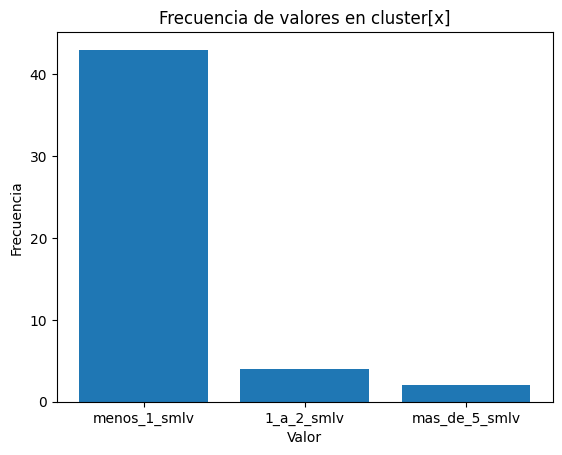

In [128]:
#ingresos solo de la produccion de cacao
freq(cluster_1,'cfin_2',['menos_1_smlv', '1_a_2_smlv', 'mas_de_5_smlv'])


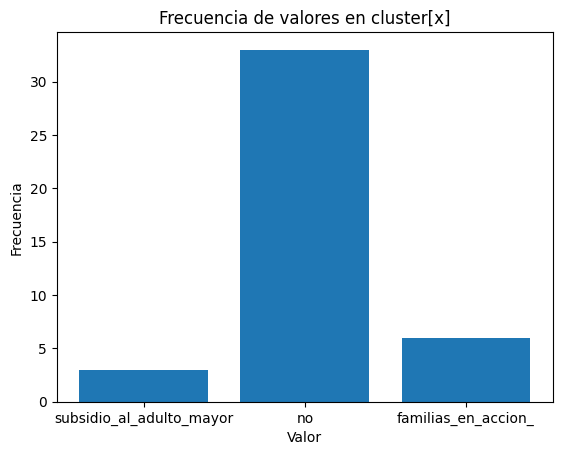

In [129]:

#subsidios recibidos por parte del estado
freq(cluster_1,'cfin_6',['subsidio_al_adulto_mayor', 'no', 'familias_en_accion_'])


In [130]:
# frecuancias absolutas de unidades productivas que reciben subsidios por parte del estado
pd.crosstab(cluster_1['cfin_6'], columns='counts')

col_0,counts
cfin_6,
familias_en_accion_,6
ingreso_solidario,6
jovenes_en_accion,1
no,33
subsidio_al_adulto_mayor,3


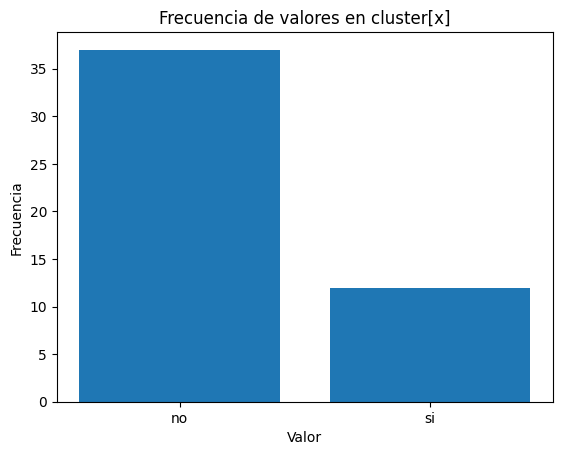

In [131]:

#Diagrama de barra  de unidades productivas que reciben subsidios por parte del estado
freq(cluster_1,'cfin_7',['no', 'si'])

In [132]:
# frecuancias absolutas de unidades productivas que reciben subsidios por parte de la actividad en cacao
pd.crosstab(cluster_1['cfin_7'], columns='counts')

col_0,counts
cfin_7,
no,37
si,12


In [133]:
cluster_1['cfin_2'].unique()

array(['menos_1_smlv', '1_a_2_smlv', 'mas_de_5_smlv'], dtype=object)

--------------------------------------------------------------------------------
#Capital Social

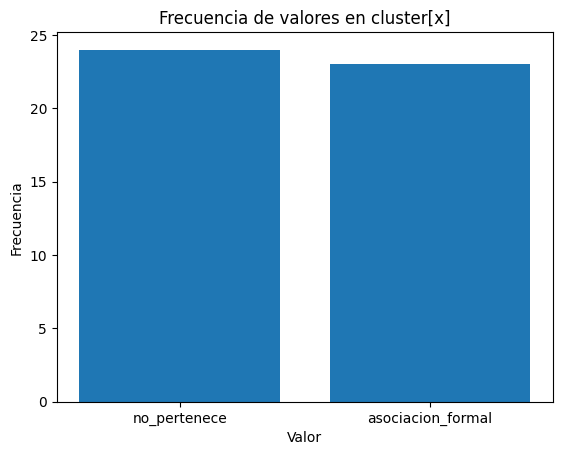

In [134]:
#pertenece a algun grupo asociativo de cacao
freq(cluster_1,'csoc_1',['no_pertenece', 'asociacion_formal'])


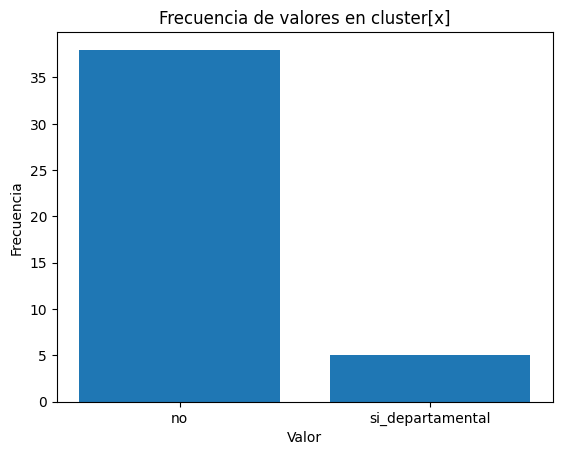

In [135]:
# reciben algun tipo de ayuda economica, asesoria, asitencia tecnica por el estado
freq(cluster_1,'csoc_4',['no', 'si_departamental'])

In [136]:
# frecuancias absolutas de unidades productivas que han recibido ayuda economica, asistencia tecninca por parte del estado.
pd.crosstab(cluster_1['csoc_4'], columns='counts')

col_0,counts
csoc_4,
no,38
si_departamental,5
"si_departamental,si_municipal",2
si_nacional,3
"si_nacional,si_departamental,si_municipal",1


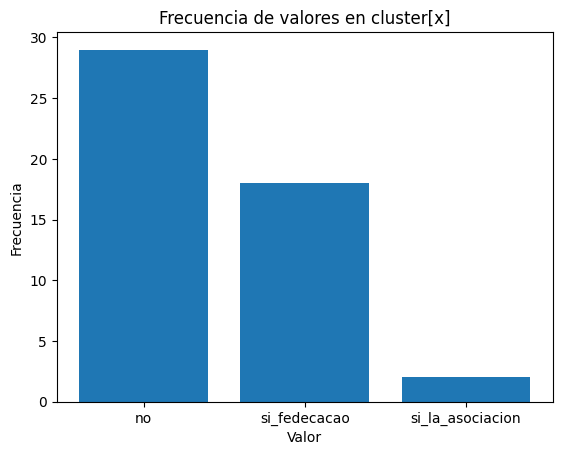

In [137]:
#ayuda economica o asistensia tecnica por otras instituciones
freq(cluster_1,'csoc_5',['no', 'si_fedecacao', 'si_la_asociacion'])


In [138]:
# frecuancias absolutas de unidades productivas que han recibido ayuda economica, asistencia tecninca por otras instituciones.
pd.crosstab(cluster_1['csoc_5'], columns='counts')

col_0,counts
csoc_5,
no,29
si_fedecacao,18
si_la_asociacion,2


###################################################################################

#cluster 2

------------------------------------------------------------------------
#Manejo Agronomico

Q1 =  67.50
Q2 =  80.00
Q3 =  150.00
Rango =  82.50
Valor Minimo =  0.00
Valor Maximo =  350.00
media =  127.50
mediana =  80.00


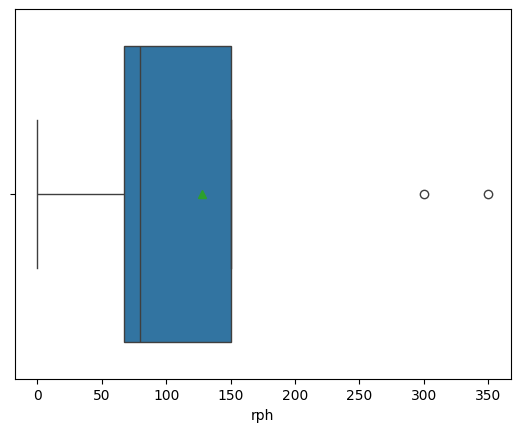

In [139]:
#rph cluster 2 (RENDIMIENTO POR HECTAREA MEDIDA EN Kg al año)
quantile(cluster_2, cluster_2.rph)

Q1 =  47.50
Q2 =  70.00
Q3 =  80.00
Rango =  32.50
Valor Minimo =  7.00
Valor Maximo =  80.00
media =  59.62
mediana =  70.00


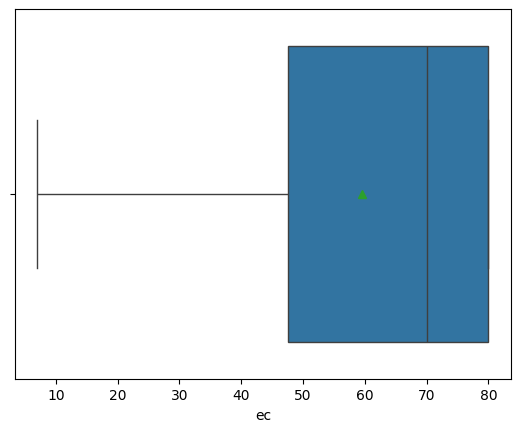

In [140]:
# edad del clutivo en años
quantile(cluster_2, cluster_2.ec)

Q1 =  11.50
Q2 =  15.00
Q3 =  15.00
Rango =  3.50
Valor Minimo =  0.00
Valor Maximo =  30.00
media =  14.00
mediana =  15.00


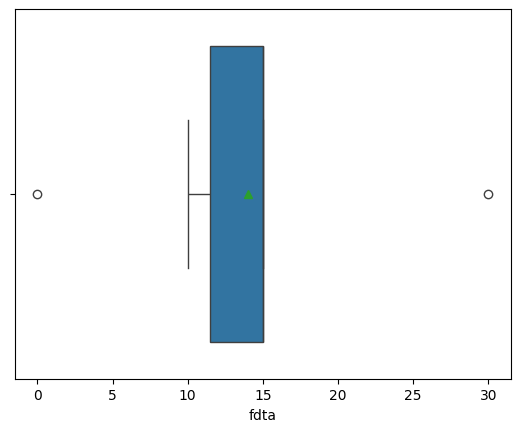

In [141]:
#frecuencia de asigancion de asignacion de turnos para riego medido en dias
quantile(cluster_2, cluster_2.fdta)

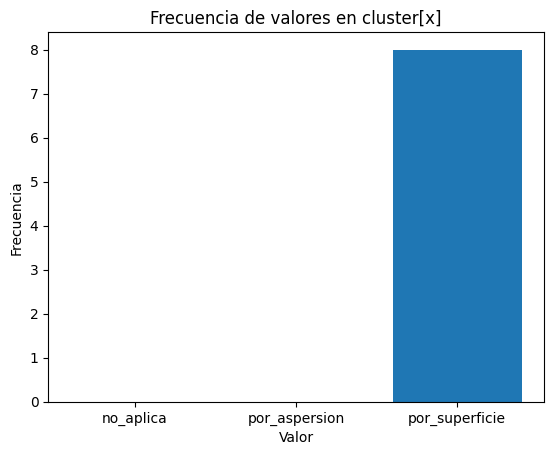

In [142]:
# tipos de sistemas de riego cluster 2
freq(cluster_2, 'tsr',['no_aplica', 'por_aspersion', 'por_superficie'] )

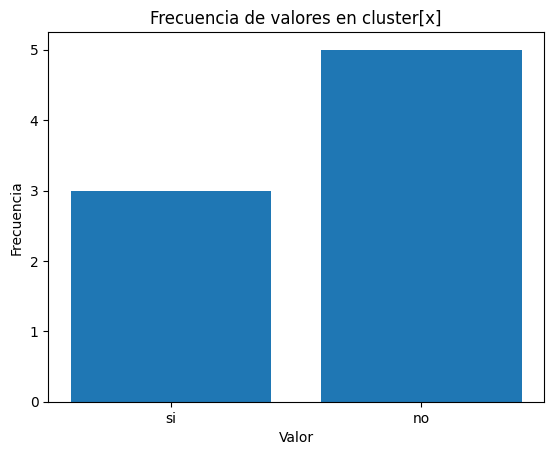

In [143]:
#aplica fertelizante
freq(cluster_2, 'af',['si', 'no'] )

In [144]:
# frecuancias absolutas del numero de unidades productivas que aplican fertilizante
pd.crosstab(cluster_2['af'], columns='counts')

col_0,counts
af,
no,5
si,3


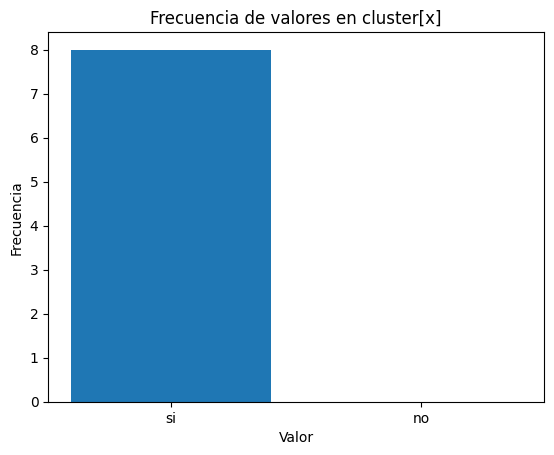

In [145]:
#Presencia de plagas en las unidades productivas
freq(cluster_2, 'ppla',['si', 'no'] )

In [146]:
# frecuancias absolutas del numero de unidades productivas que presentan plagas
pd.crosstab(cluster_2['ppla'], columns='counts')

col_0,counts
ppla,
si,8


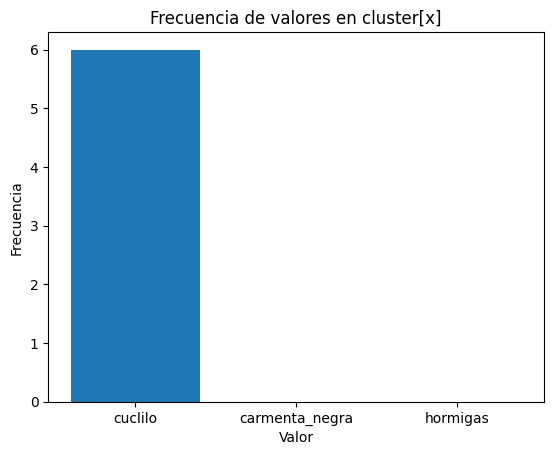

In [147]:
#tipo de plaga principal
freq(cluster_2, 'tplam',['cuclilo', 'carmenta_negra', 'hormigas'] )

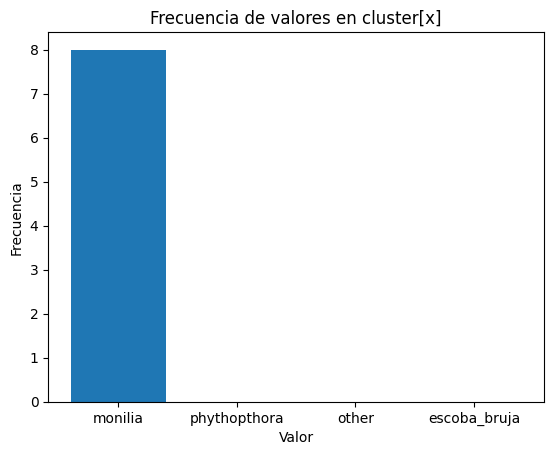

In [148]:
##enfermedad principal
freq(cluster_2, 'tenfm',['monilia', 'phythopthora', 'other', 'escoba_bruja'] )

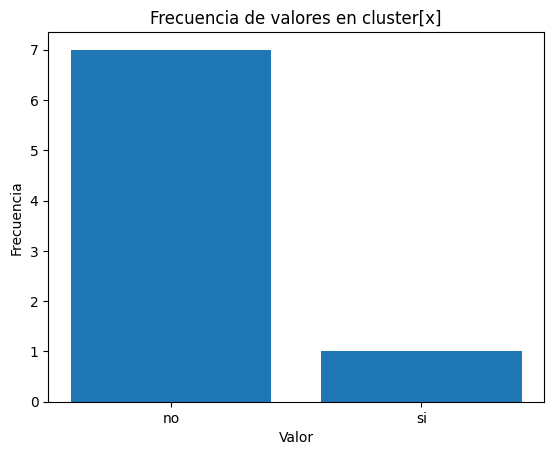

In [149]:
#aplican fungicidas
freq(cluster_2, 'afun',['no', 'si'])

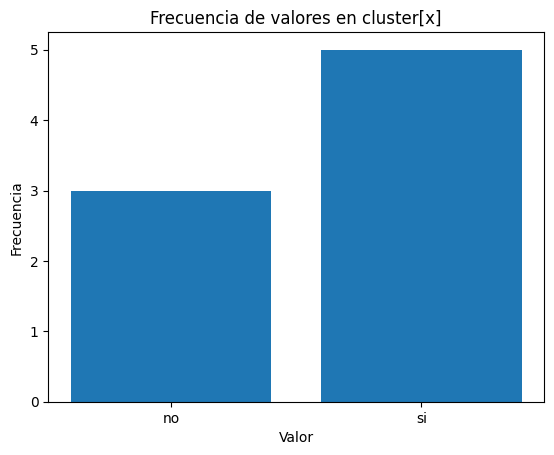

In [150]:
#aplican plagicidas
freq(cluster_2, 'apla',['no', 'si'])

------------------------------------------------------------------------
#Actividades de Postcosecha

In [151]:
#frecuencia absoluta del tipo de postcosecha realizada
pd.crosstab(cluster_2['pstc_1'], columns='counts')

col_0,counts
pstc_1,
extraccion_del_grano,7
other,1


In [152]:
#frecuencia absoluta del tipo de infraestructura para la  postcosecha
pd.crosstab(cluster_2['pstc_2'], columns='counts')

col_0,counts
pstc_2,
cajon_de_fermentacion,1
other,7


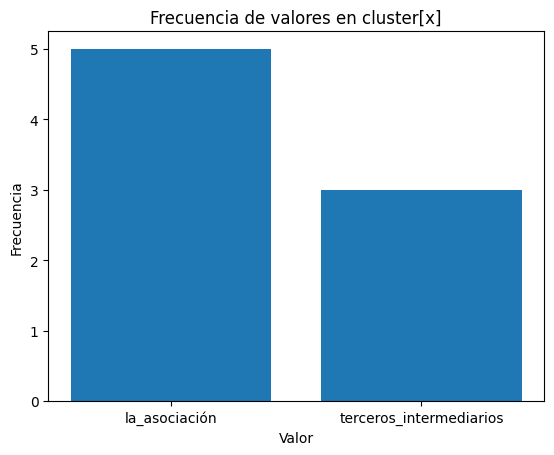

In [153]:
##frecuencia absoluta de la plataforma donde se relaiza la venta de cacao
freq(cluster_2, 'pstc_4',['la_asociación', 'terceros_intermediarios'])


--------------------------------------------------------------------------------
#Capital Natural

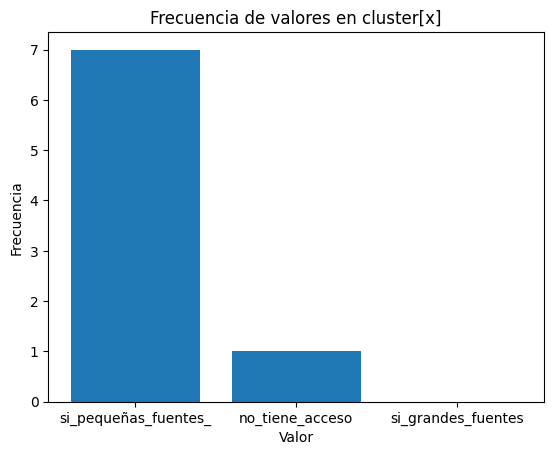

In [154]:
# acceso a fuentes naturales de agua de buena calidad
freq(cluster_2, 'cnat_1',['si_pequeñas_fuentes_', 'no_tiene_acceso', 'si_grandes_fuentes'] )

-----------------------------------------------------------
#variedad


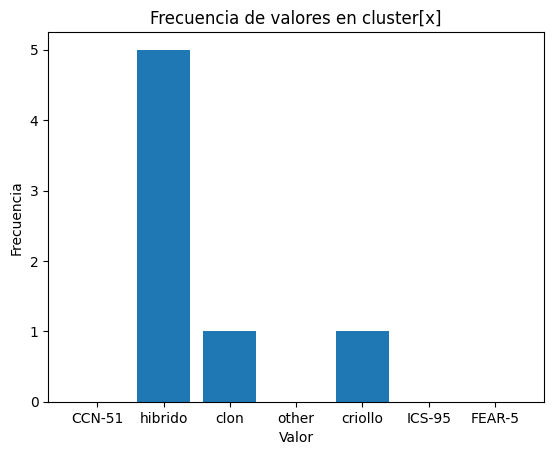

In [155]:
freq(cluster_2, 'vm',['CCN-51', 'hibrido', 'clon', 'other', 'criollo', 'ICS-95',
       'FEAR-5'])

-----------------------------------------------------------
#Fisica de suelos
Analisis de las variables de los resultados de fisica de suelo pertenecientes al CLUSTER 2.

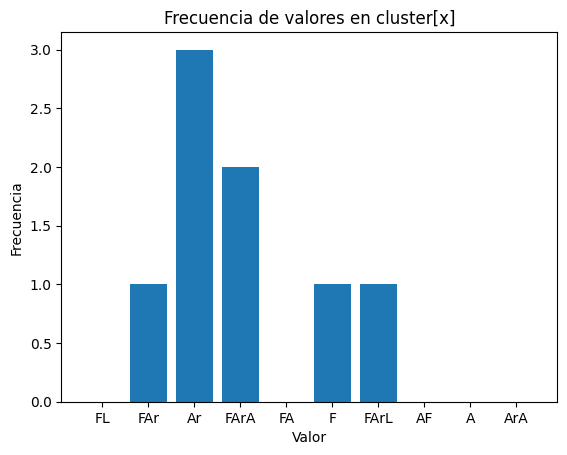

In [156]:
#clases Texturales
freq(cluster_2, 'Textura',['FL', 'FAr', 'Ar', 'FArA', 'FA', 'F', 'FArL', 'AF', 'A', 'ArA'])

In [157]:
pd.crosstab(cluster_2['Textura'], columns='counts')

col_0,counts
Textura,
Ar,3
F,1
FAr,1
FArA,2
FArL,1


Q1 =  7.09
Q2 =  7.29
Q3 =  7.35
Rango =  0.26
Valor Minimo =  6.68
Valor Maximo =  7.59
media =  7.21
mediana =  7.29


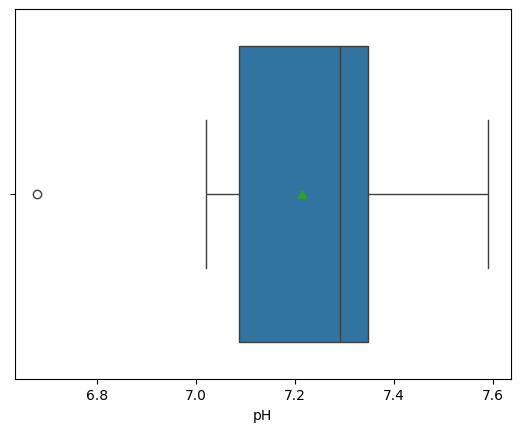

In [158]:
#pH
quantile(cluster_2, cluster_2.pH)


Q1 =  0.08
Q2 =  0.09
Q3 =  0.10
Rango =  0.02
Valor Minimo =  0.06
Valor Maximo =  0.12
media =  0.09
mediana =  0.09


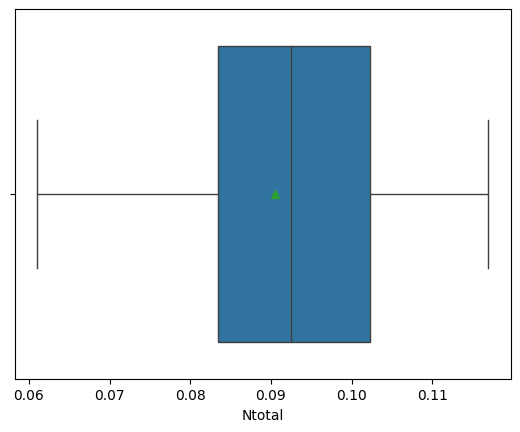

In [159]:
#nitrogeno total
quantile(cluster_2, cluster_2.Ntotal)

Q1 =  1.39
Q2 =  1.46
Q3 =  1.48
Rango =  0.09
Valor Minimo =  1.13
Valor Maximo =  1.50
media =  1.40
mediana =  1.46


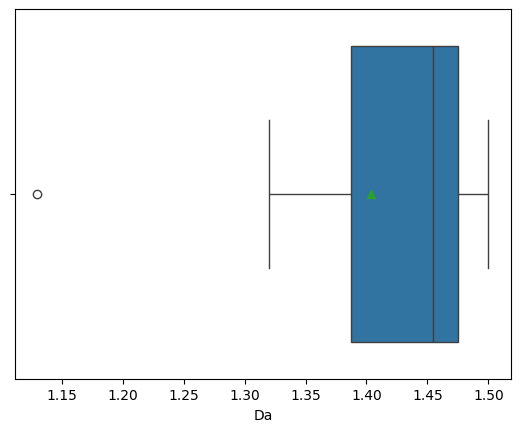

In [160]:
#densidad aparente
quantile(cluster_2, cluster_2.Da)

-----------------------------------------------------
#Capital financiero

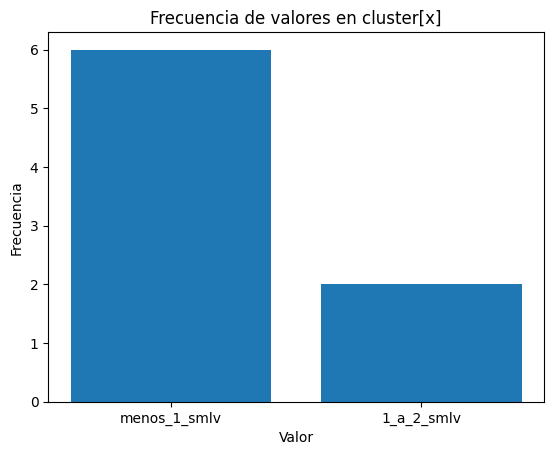

In [161]:
#valor estimado de todos los ingresos mensuales del nucleo familiar
freq(cluster_2,'cfin_1',['menos_1_smlv', '1_a_2_smlv'])


In [162]:
# frecuancias absolutas de el valor estimado de todos los ingresos mensuales del nucleo familiar
pd.crosstab(cluster_2['cfin_1'], columns='counts')


col_0,counts
cfin_1,
1_a_2_smlv,2
menos_1_smlv,6


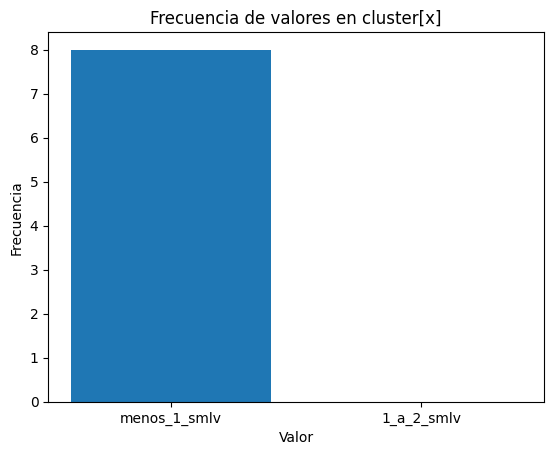

In [163]:
#ingresos solo de la produccion de cacao
freq(cluster_2,'cfin_2',['menos_1_smlv', '1_a_2_smlv'])


In [164]:
# frecuancias absolutas de unidades productivas que reciben subsidios por parte del estado
pd.crosstab(cluster_2['cfin_6'], columns='counts')

col_0,counts
cfin_6,
familias_en_accion_,3
no,5


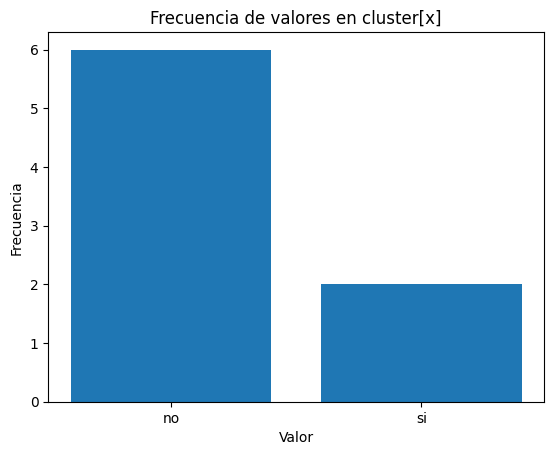

In [165]:
#Diagrama de barra  de unidades productivas que reciben subsidios por parte del estado
freq(cluster_2,'cfin_7',['no', 'si'])

In [166]:
# frecuancias absolutas de unidades productivas que reciben subsidios por parte de la actividad en cacao
pd.crosstab(cluster_2['cfin_7'], columns='counts')

col_0,counts
cfin_7,
no,6
si,2


--------------------------------------------------------------------------------
#Capital Social

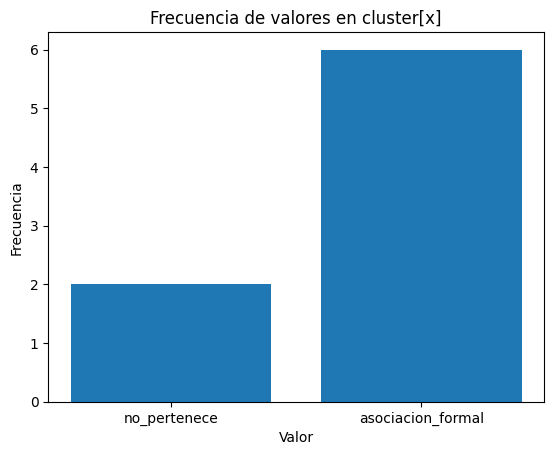

In [167]:
#pertenece a algun grupo asociativo de cacao
freq(cluster_2,'csoc_1',['no_pertenece', 'asociacion_formal'])


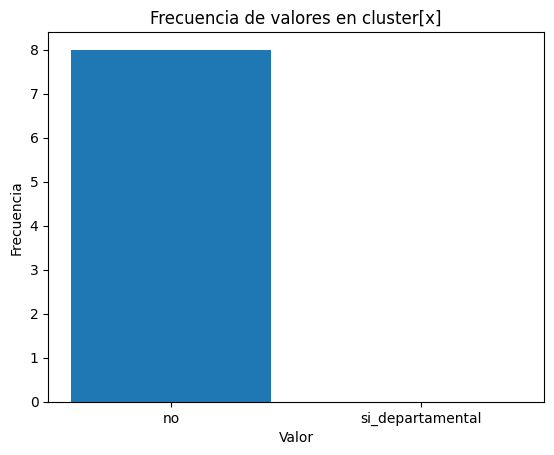

In [168]:
# reciben algun tipo de ayuda economica, asesoria, asitencia tecnica por el estado
freq(cluster_2,'csoc_4',['no', 'si_departamental'])

In [169]:
# frecuancias absolutas de unidades productivas que han recibido ayuda economica, asistencia tecninca por parte del estado.
pd.crosstab(cluster_2['csoc_4'], columns='counts')

col_0,counts
csoc_4,
no,8


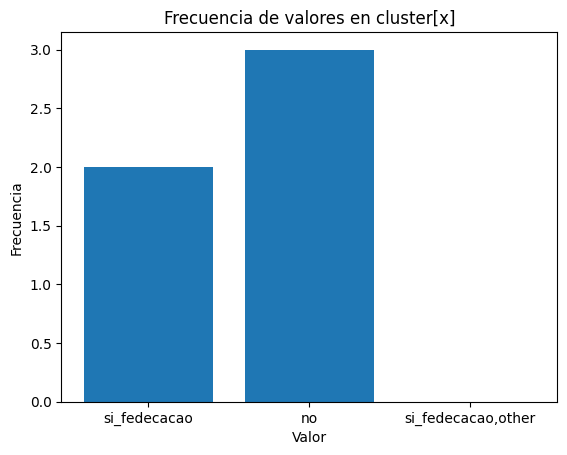

In [170]:
#ayuda economica o asistensia tecnica por otras instituciones
freq(cluster_2,'csoc_5',['si_fedecacao', 'no', 'si_fedecacao,other'])


In [171]:
# frecuancias absolutas de unidades productivas que han recibido ayuda economica, asistencia tecninca por otras instituciones.
pd.crosstab(cluster_2['csoc_5'], columns='counts')

col_0,counts
csoc_5,
no,3
si_fedecacao,2
si_la_asociacion,3


##########################################################################


# cluster -1
En este cluster estan los predios que no comparten caracteristicas similares y no pudieron ser agrupados en ninguno de los otros grupos, y entran en el grupo de los outliers.

------------------------------------------------------------------------
#Manejo Agronomico


Q1 =  12.00
Q2 =  80.00
Q3 =  80.00
Rango =  68.00
Valor Minimo =  12.00
Valor Maximo =  80.00
media =  50.86
mediana =  80.00


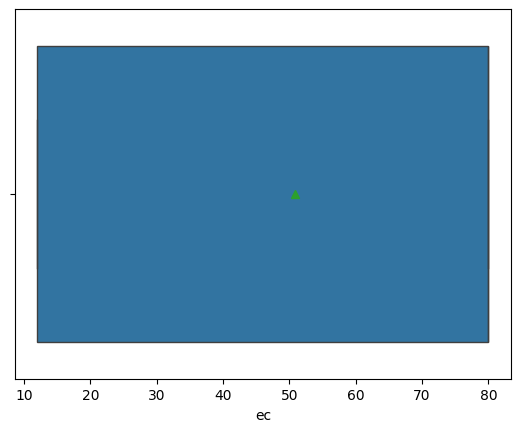

In [175]:
# edad del clutivo en años
quantile(cluster_menos1, cluster_menos1.ec)

Q1 =  10.00
Q2 =  15.00
Q3 =  15.00
Rango =  5.00
Valor Minimo =  10.00
Valor Maximo =  15.00
media =  12.86
mediana =  15.00


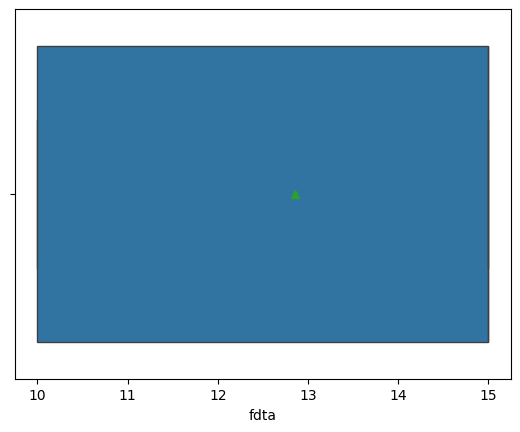

In [176]:
#frecuencia de asigancion de asignacion de turnos para riego medido en dias
quantile(cluster_menos1, cluster_menos1.fdta)

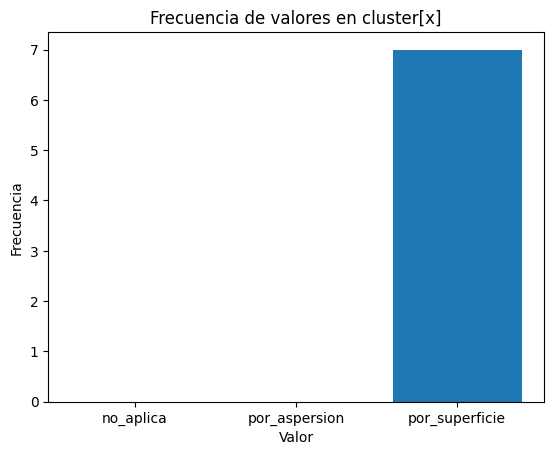

In [178]:
# tipos de sistemas de riego cluster 2
freq(cluster_menos1, 'tsr',['no_aplica', 'por_aspersion', 'por_superficie'] )

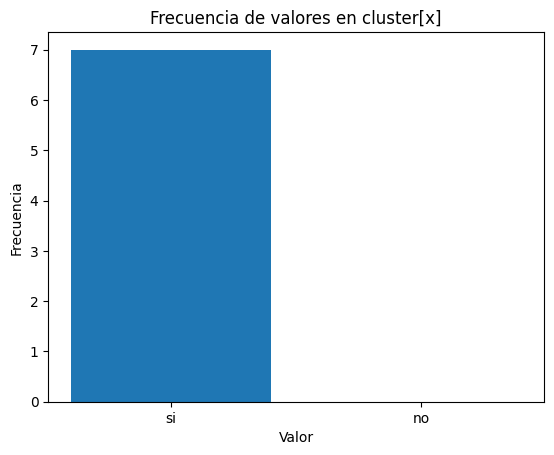

In [179]:
#aplica fertelizante
freq(cluster_menos1, 'af',['si', 'no'] )


In [180]:
# frecuancias absolutas del numero de unidades productivas que aplican fertilizante
pd.crosstab(cluster_menos1['af'], columns='counts')

col_0,counts
af,
si,7


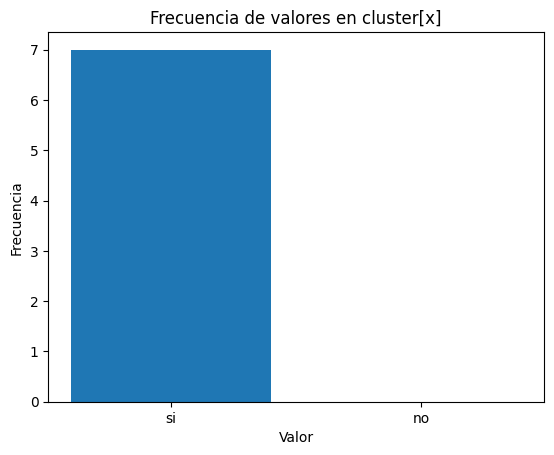

In [181]:
#Presencia de plagas en las unidades productivas
freq(cluster_menos1, 'ppla',['si', 'no'] )


In [ ]:
#tipo de plaga principal
freq(cluster_0, 'tplam',['cuclilo', 'other'] )

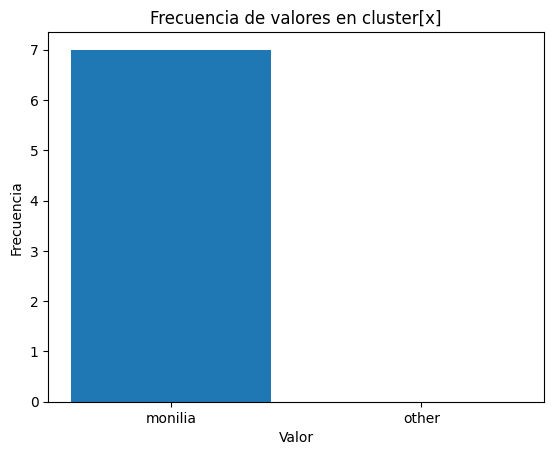

In [182]:
##enfermedad principal
freq(cluster_menos1, 'tenfm',['monilia', 'other'] )

In [ ]:
#aplican fungicidas
freq(cluster_menos_1, 'afun',['no', 'si'])

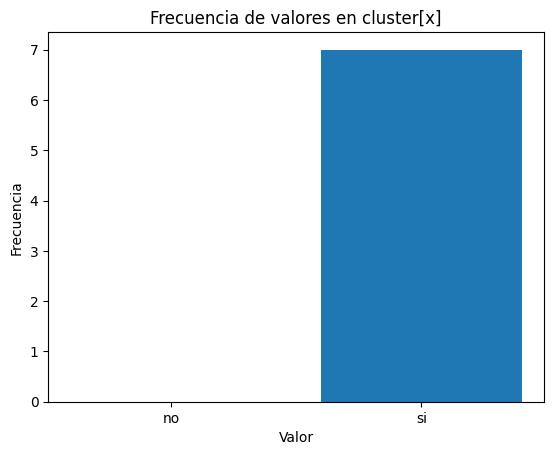

In [183]:
#aplican plagicidas
freq(cluster_menos1, 'apla',['no', 'si'])

------------------------------------------------------------------------
#Actividades de Postcosecha

In [184]:
#frecuencia absoluta del tipo de postcosecha realizada
pd.crosstab(cluster_menos1['pstc_1'], columns='counts')


col_0,counts
pstc_1,
extraccion_del_grano,7


In [185]:
#frecuencia absoluta del tipo de infraestructura para la  postcosecha
pd.crosstab(cluster_menos1['pstc_2'], columns='counts')


col_0,counts
pstc_2,
"cajon_de_fermentacion,bandejas_para_secad",4
other,3


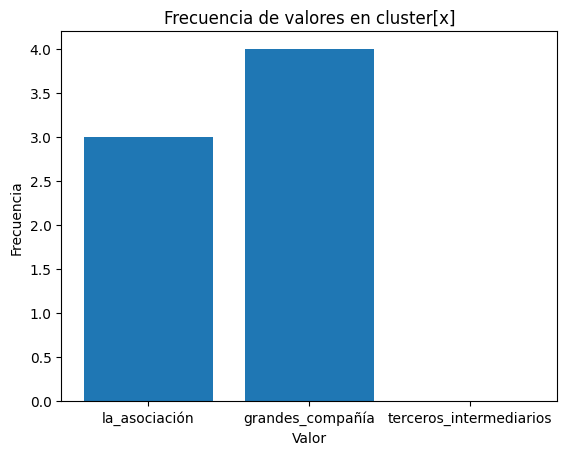

In [186]:

##frecuencia absoluta de la plataforma donde se relaiza la venta de cacao
freq(cluster_menos1, 'pstc_4',['la_asociación', 'grandes_compañía', 'terceros_intermediarios'])


--------------------------------------------------------------------------------
#Capital Natural

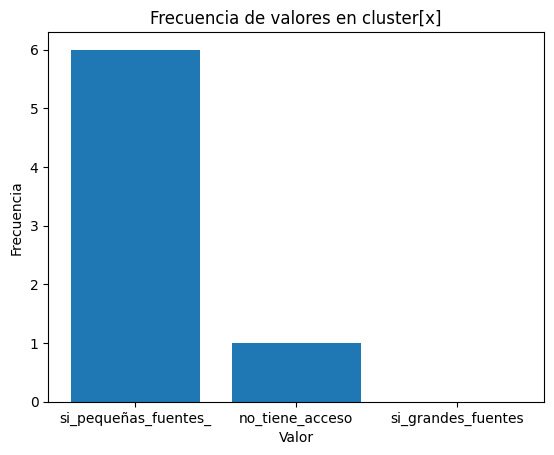

In [187]:
# acceso a fuentes naturales de agua de buena calidad
freq(cluster_menos1, 'cnat_1',['si_pequeñas_fuentes_', 'no_tiene_acceso', 'si_grandes_fuentes'] )

---------------------------------------------------------
#variedad
materiales de cacao presentes en el cluster -1.

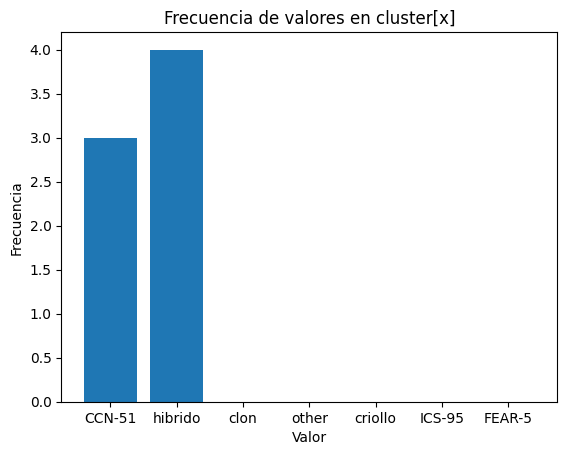

In [188]:
freq(cluster_menos1, 'vm',['CCN-51', 'hibrido', 'clon', 'other', 'criollo', 'ICS-95',
       'FEAR-5'])

---------------------------------------------------------
#Fisica de suelos
Analisis de las variables de los resultados de fisica de suelo pertenecientes al CLUSTER -1.

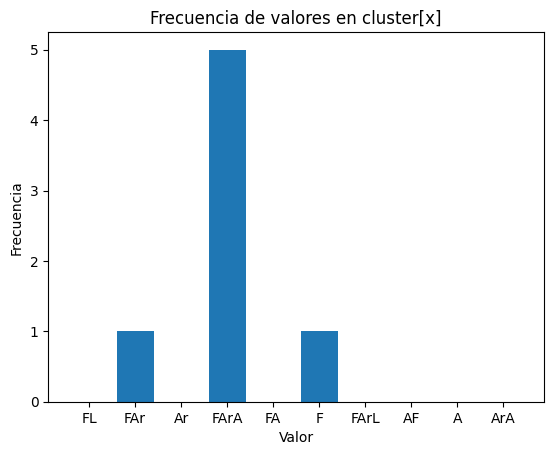

In [189]:
#clases Texturales
freq(cluster_menos1, 'Textura',['FL', 'FAr', 'Ar', 'FArA', 'FA', 'F', 'FArL', 'AF', 'A', 'ArA'])

In [190]:
pd.crosstab(cluster_menos1['Textura'], columns='counts')

col_0,counts
Textura,
F,1
FAr,1
FArA,5


Q1 =  7.20
Q2 =  7.22
Q3 =  7.46
Rango =  0.26
Valor Minimo =  6.93
Valor Maximo =  7.58
media =  7.29
mediana =  7.22


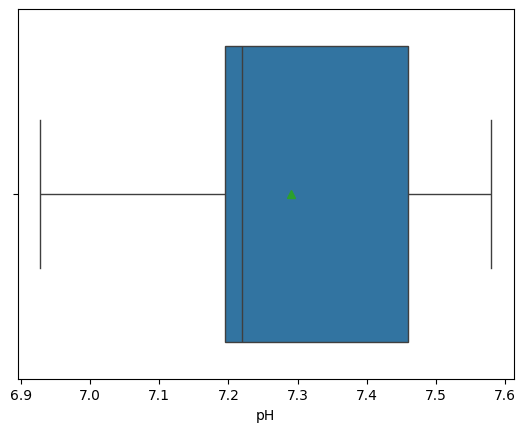

In [177]:
#pH
quantile(cluster_menos1, cluster_menos1.pH)


Q1 =  0.07
Q2 =  0.08
Q3 =  0.09
Rango =  0.02
Valor Minimo =  0.04
Valor Maximo =  0.16
media =  0.09
mediana =  0.08


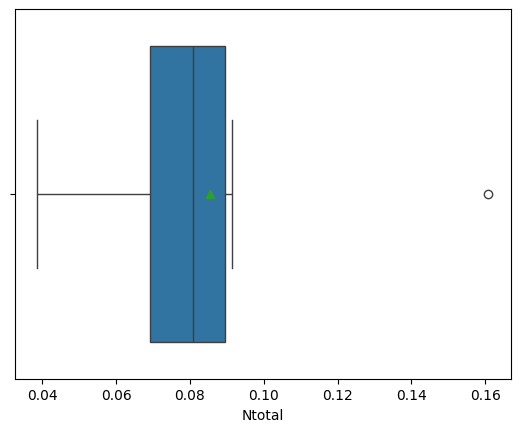

In [192]:
#nitrogeno total
quantile(cluster_menos1, cluster_menos1.Ntotal)

Q1 =  1.40
Q2 =  1.42
Q3 =  1.46
Rango =  0.06
Valor Minimo =  1.40
Valor Maximo =  1.52
media =  1.44
mediana =  1.42


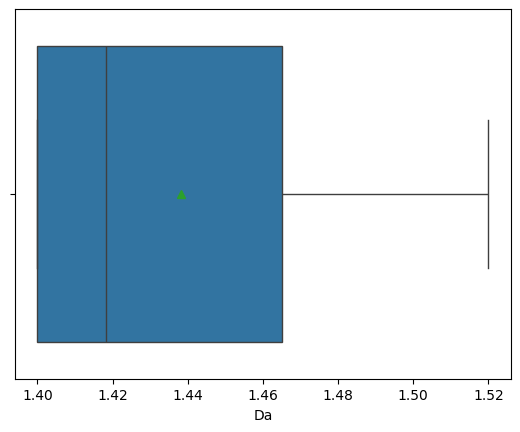

In [193]:
#densidad aparente
quantile(cluster_menos1, cluster_menos1.Da)

-----------------------------------------------------
#Capital financiero

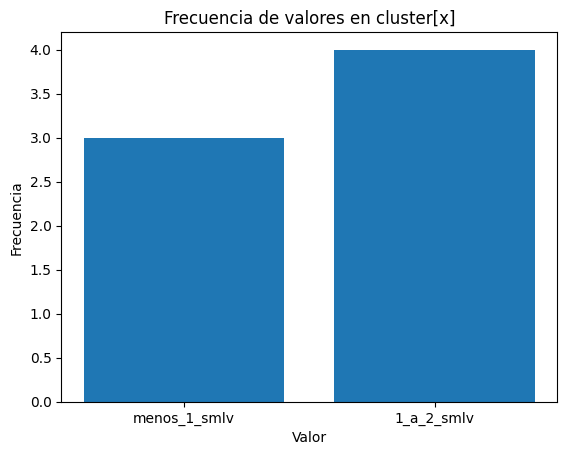

In [194]:
#valor estimado de todos los ingresos mensuales del nucleo familiar
freq(cluster_menos1,'cfin_1',['menos_1_smlv', '1_a_2_smlv'])

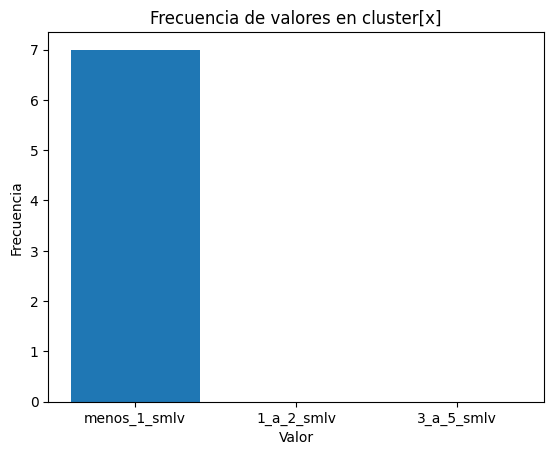

In [195]:
#ingresos solo de la produccion de cacao
freq(cluster_menos1,'cfin_2',['menos_1_smlv', '1_a_2_smlv', '3_a_5_smlv'])


In [196]:
# frecuancias absolutas de unidades productivas que reciben subsidios por parte del estado
pd.crosstab(cluster_menos1['cfin_6'], columns='counts')

col_0,counts
cfin_6,
no,7


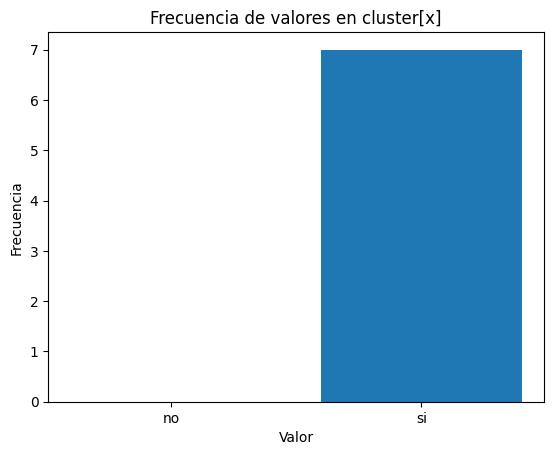

In [197]:
#Diagrama de barra  de unidades productivas que reciben subsidios por parte de la actividad en cacao
freq(cluster_menos1,'cfin_7',['no', 'si'])


In [198]:
# frecuancias absolutas de unidades productivas que reciben subsidios por parte de la actividad en cacao
pd.crosstab(cluster_menos1['cfin_7'], columns='counts')


col_0,counts
cfin_7,
si,7


--------------------------------------------------------------------------------
#Capital Social

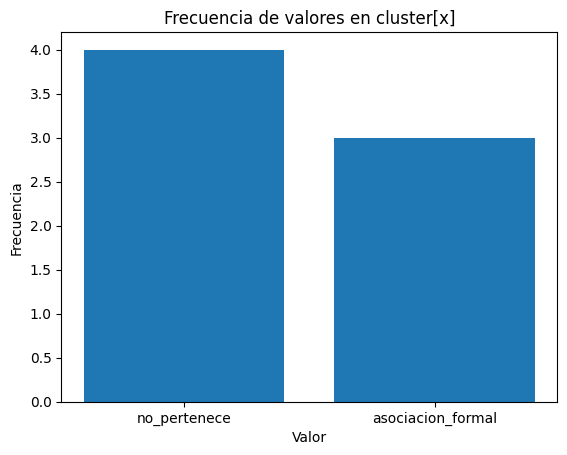

In [199]:
#pertenece a algun grupo asociativo de cacao
freq(cluster_menos1,'csoc_1',['no_pertenece', 'asociacion_formal'])


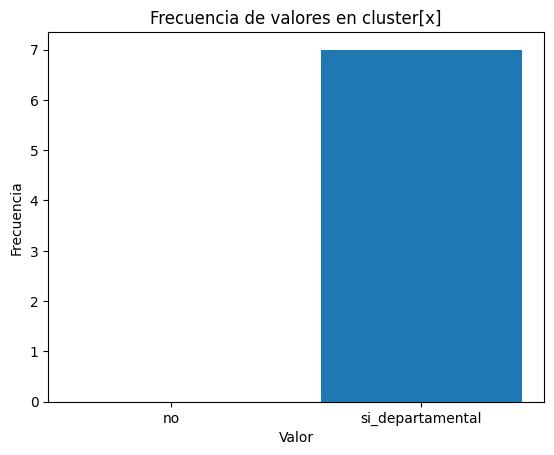

In [200]:

# reciben algun tipo de ayuda economica, asesoria, asitencia tecnica por el estado
freq(cluster_menos1,'csoc_4',['no', 'si_departamental'])

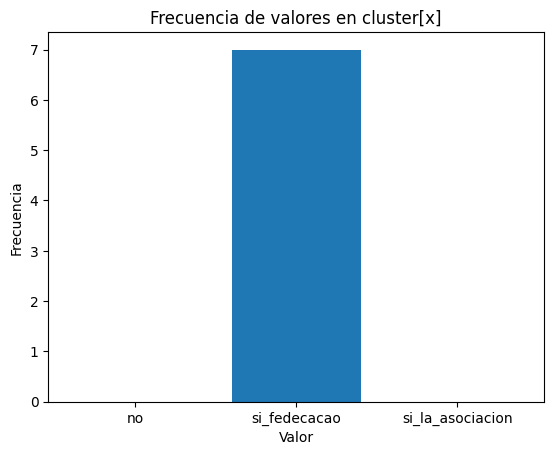

In [201]:
#ayuda economica o asistensia tecnica por otras instituciones
freq(cluster_menos1,'csoc_5',['no', 'si_fedecacao', 'si_la_asociacion'])


#----------------------------------------------------------------------------------

# Cluster 3

Q1 =  50.00
Q2 =  350.00
Q3 =  350.00
Rango =  300.00
Valor Minimo =  0.00
Valor Maximo =  900.00
media =  330.77
mediana =  350.00


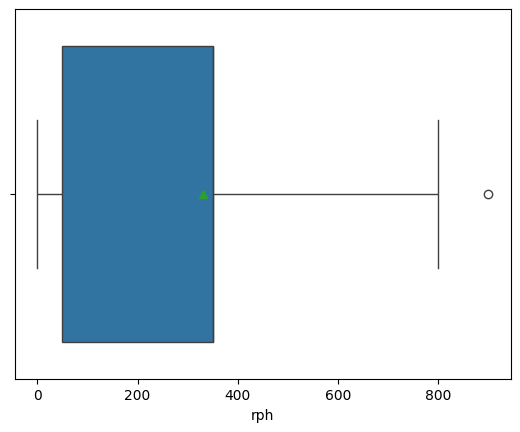

In [202]:
#rph cluster 3 (RENDIMIENTO POR HECTAREA MEDIDA EN Kg al año)
quantile(cluster_3, cluster_3.rph)#resumen de los 5 estadisticos descriptivos principales visualizados en un diagrama boxplot

Q1 =  20.00
Q2 =  20.00
Q3 =  30.00
Rango =  10.00
Valor Minimo =  2.00
Valor Maximo =  45.00
media =  23.31
mediana =  20.00


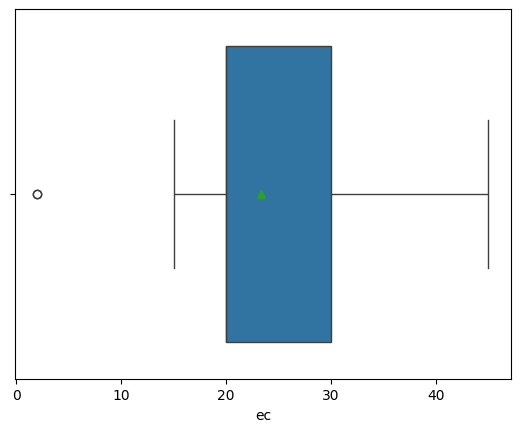

In [203]:
# edad del clutivo en años
quantile(cluster_3, cluster_3.ec)

Q1 =  12.00
Q2 =  12.00
Q3 =  12.00
Rango =  0.00
Valor Minimo =  0.00
Valor Maximo =  48.00
media =  14.85
mediana =  12.00


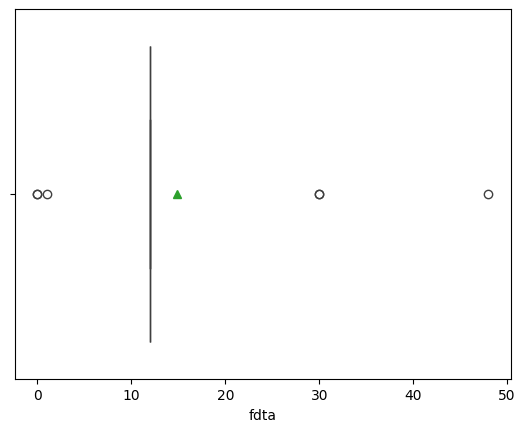

In [204]:
#frecuencia de asigancion de asignacion de turnos para riego medido en dias
quantile(cluster_3, cluster_3.fdta)

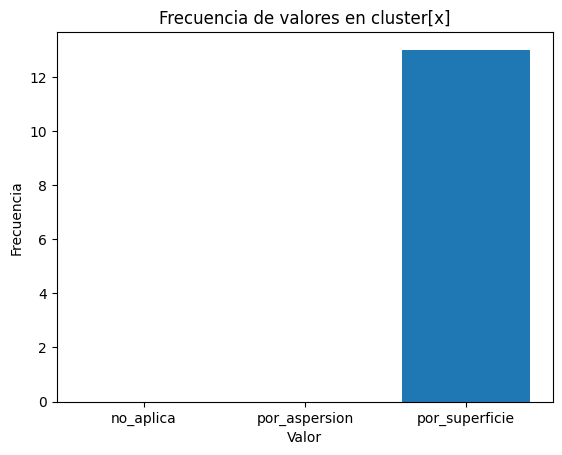

In [205]:
# tipos de sistemas de riego cluster 0
freq(cluster_3, 'tsr',['no_aplica', 'por_aspersion', 'por_superficie'] )

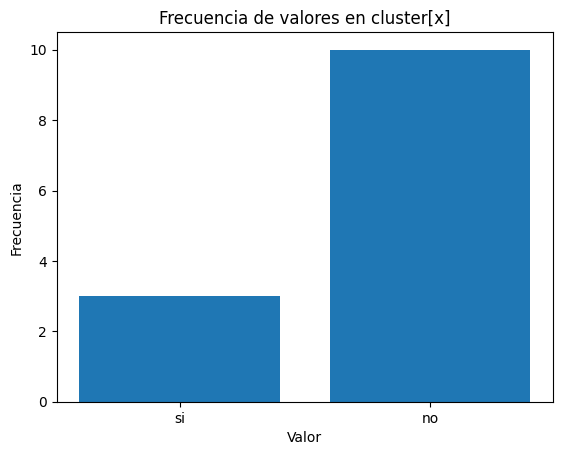

In [206]:
#aplica fertelizante
freq(cluster_3, 'af',['si', 'no'] )

In [207]:
# frecuancias absolutas del numero de unidades productivas que aplican fertilizante
pd.crosstab(cluster_3['af'], columns='counts')

col_0,counts
af,
no,10
si,3


In [208]:
# frecuancias absolutas del numero de unidades productivas que presentan plagas
pd.crosstab(cluster_3['ppla'], columns='counts')

col_0,counts
ppla,
no,1
si,12


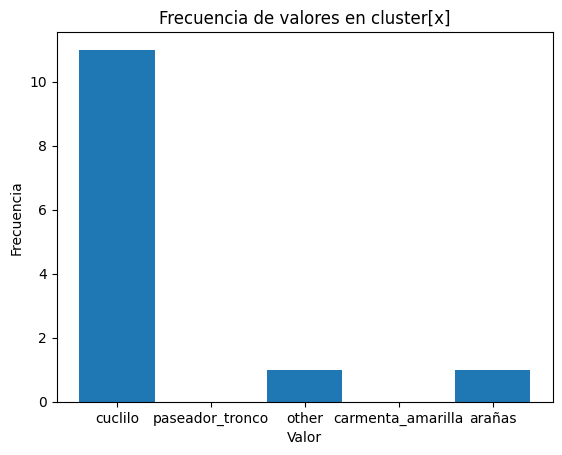

In [209]:
#tipo de plaga principal
freq(cluster_3, 'tplam',['cuclilo', 'paseador_tronco', 'other', 'carmenta_amarilla',
       'arañas'] )

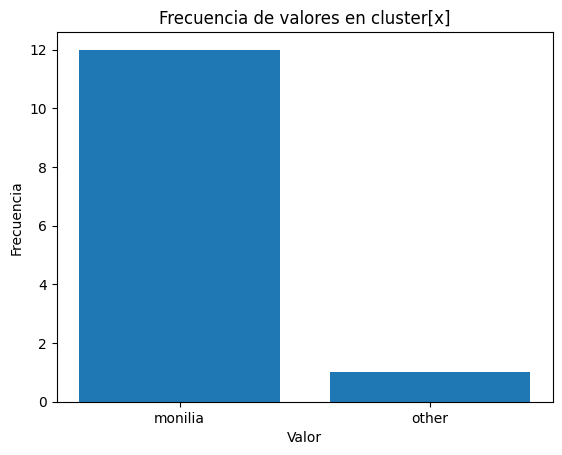

In [210]:
##enfermedad principal
freq(cluster_3, 'tenfm',['monilia', 'other'] )

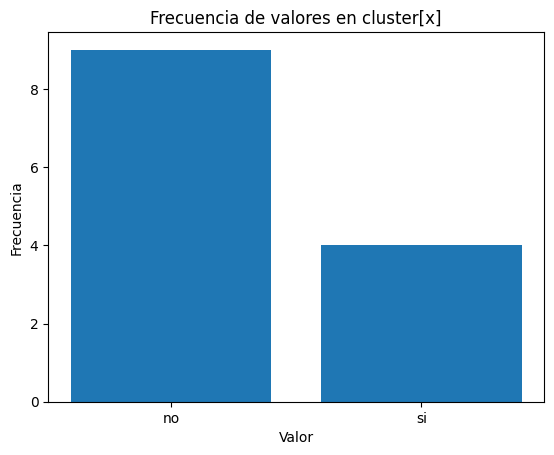

In [211]:
#aplican fungicidas
freq(cluster_0, 'afun',['no', 'si'])

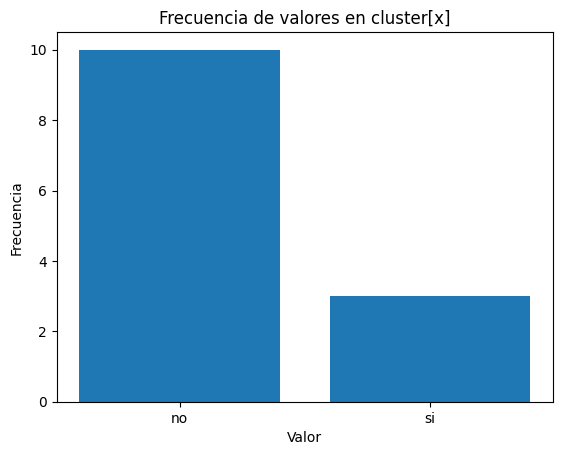

In [212]:
#aplican plagicidas
freq(cluster_3, 'apla',['no', 'si'])

------------------------------------------------------------------------
#Actividades de Postcosecha

In [214]:
#frecuencia absoluta del tipo de postcosecha realizada
pd.crosstab(cluster_3['pstc_1'], columns='counts')

col_0,counts
pstc_1,
beneficio_del_gran,8
extraccion_del_grano,1
transformacion_primaria_del_gra,4


In [217]:
#frecuencia absoluta del tipo de infraestructura para la  postcosecha
pd.crosstab(cluster_3['pstc_2'], columns='counts')

col_0,counts
pstc_2,
"cajon_de_fermentacion,bandejas_para_secad,beneficiadero_propio",3
"cajon_de_fermentacion,bandejas_para_secad,beneficiadero_propio,central_de_beneficio,espacio_de_transformación_prima",1
other,9


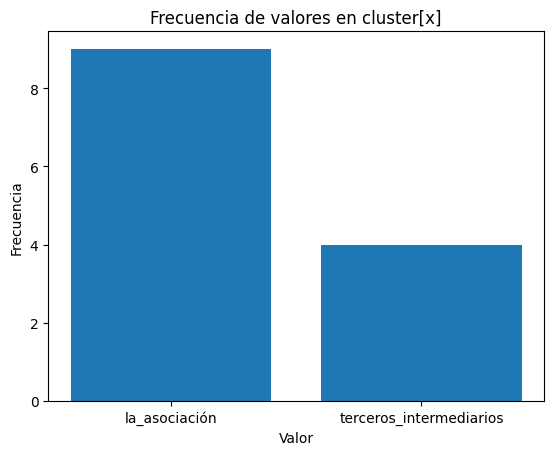

In [218]:
##frecuencia absoluta de la plataforma donde se relaiza la venta de cacao
freq(cluster_3, 'pstc_4',['la_asociación', 'terceros_intermediarios'])

-----------------------------------------------------------------
#variedad
materiales de cacao presentes en el cluster 3

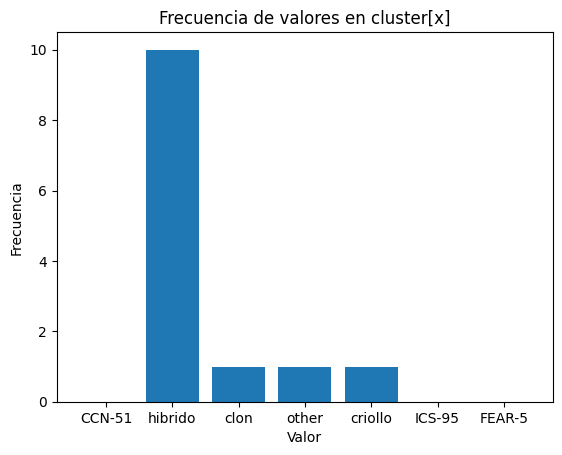

In [219]:
freq(cluster_3, 'vm',['CCN-51', 'hibrido', 'clon', 'other', 'criollo', 'ICS-95',
       'FEAR-5'])

--------------------------------------------------------------------
# Fisica de suelos
Analisis de las variables de los resultados de fisica de suelo pertenecientes al CLUSTER 3.

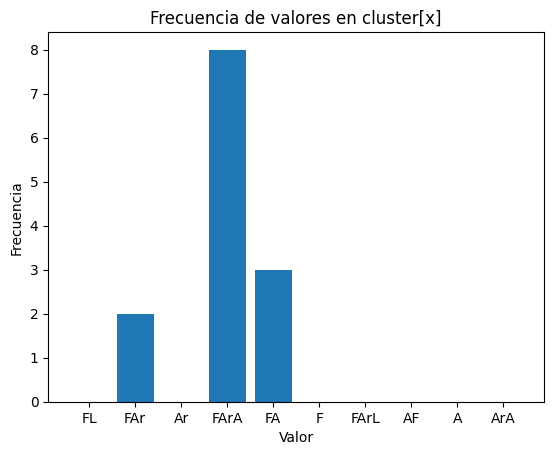

In [221]:
#clases texturales
freq(cluster_3, 'Textura',['FL', 'FAr', 'Ar', 'FArA', 'FA', 'F', 'FArL', 'AF', 'A', 'ArA'])

In [222]:
pd.crosstab(cluster_3['Textura'], columns='counts')#tabla de frecuencias de las clases texturales en el cluster 3

col_0,counts
Textura,
FA,3
FAr,2
FArA,8


Q1 =  7.15
Q2 =  7.44
Q3 =  7.60
Rango =  0.45
Valor Minimo =  6.59
Valor Maximo =  7.68
media =  7.33
mediana =  7.44


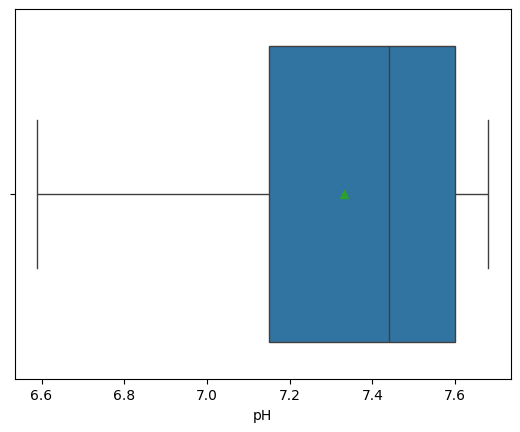

In [223]:
#pH
quantile(cluster_3, cluster_3.pH)

Q1 =  0.06
Q2 =  0.07
Q3 =  0.08
Rango =  0.03
Valor Minimo =  0.02
Valor Maximo =  0.13
media =  0.07
mediana =  0.07


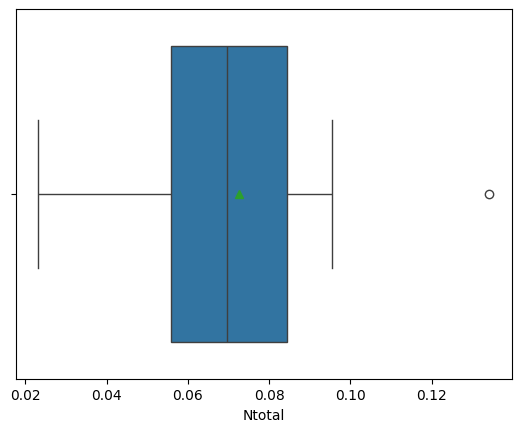

In [224]:
#nitrogeno total
quantile(cluster_3, cluster_3.Ntotal)

Q1 =  1.34
Q2 =  1.45
Q3 =  1.50
Rango =  0.16
Valor Minimo =  1.27
Valor Maximo =  1.54
media =  1.43
mediana =  1.45


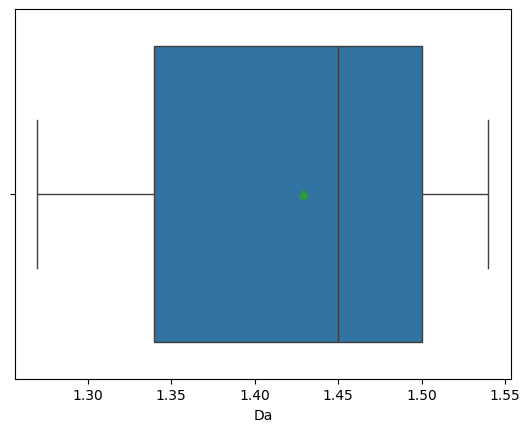

In [225]:
#densidad aparente
quantile(cluster_3, cluster_3.Da)

--------------------------------------------------------------------------------
#Capital financiero

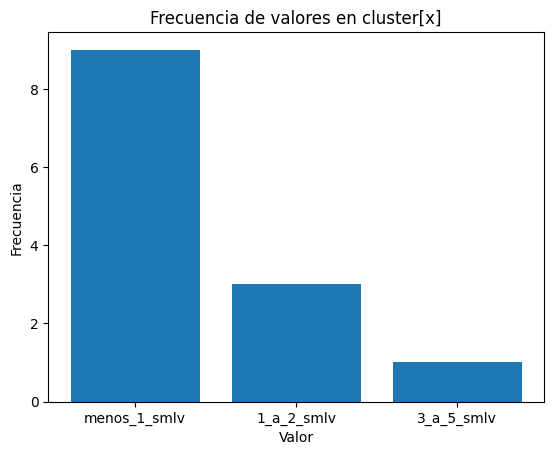

In [226]:
#valor estimado de todos los ingresos mensuales del nucleo familiar
freq(cluster_3,'cfin_1',['menos_1_smlv', '1_a_2_smlv', '3_a_5_smlv'])

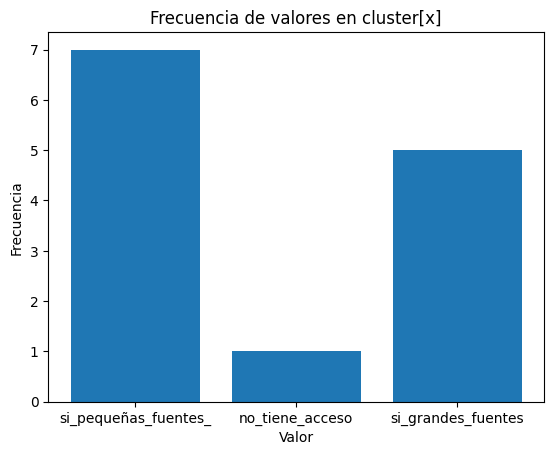

In [227]:
# acceso a fuentes naturales de agua de buena calidad
freq(cluster_3, 'cnat_1',['si_pequeñas_fuentes_', 'no_tiene_acceso', 'si_grandes_fuentes'] )

In [228]:
# frecuancias absolutas de el valor estimado de todos los ingresos mensuales del nucleo familiar
pd.crosstab(cluster_3['cfin_1'], columns='counts')

col_0,counts
cfin_1,
1_a_2_smlv,3
3_a_5_smlv,1
menos_1_smlv,9


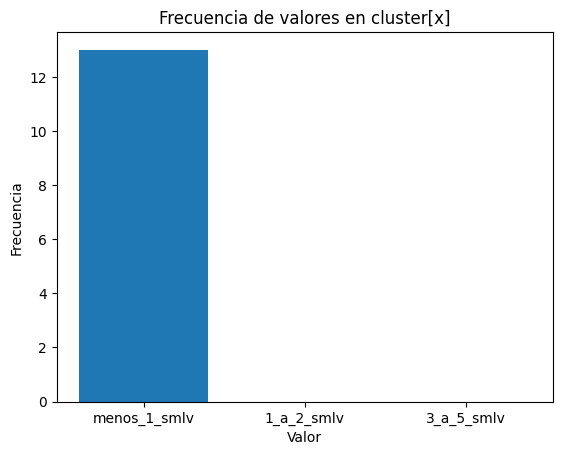

In [229]:
#ingresos solo de la produccion de cacao
freq(cluster_3,'cfin_2',['menos_1_smlv', '1_a_2_smlv', '3_a_5_smlv'])

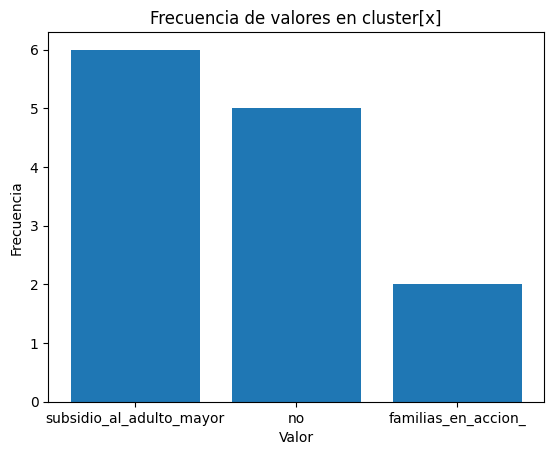

In [230]:
#subsidios recibidos por parte del estado
freq(cluster_3,'cfin_6',['subsidio_al_adulto_mayor', 'no', 'familias_en_accion_'])

In [231]:
# frecuancias absolutas de unidades productivas que reciben subsidios por parte del estado
pd.crosstab(cluster_3['cfin_6'], columns='counts')

col_0,counts
cfin_6,
familias_en_accion_,2
no,5
subsidio_al_adulto_mayor,6


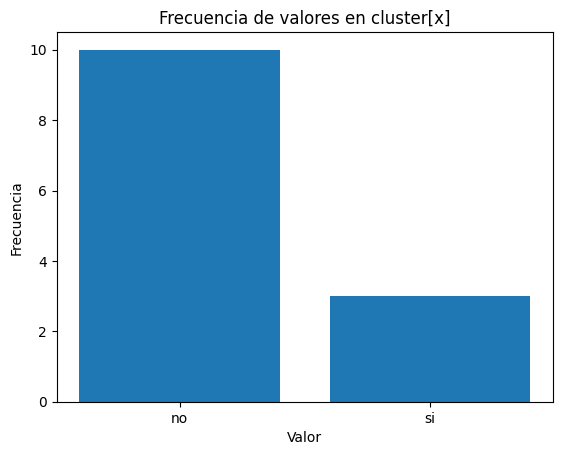

In [232]:
#Diagrama de barra  de unidades productivas que reciben subsidios por parte del estado
freq(cluster_3,'cfin_7',['no', 'si'])

In [233]:
# frecuancias absolutas de unidades productivas que reciben subsidios por parte de la actividad en cacao
pd.crosstab(cluster_3['cfin_7'], columns='counts')

col_0,counts
cfin_7,
no,10
si,3


--------------------------------------------------------------------------------
#Capital Social

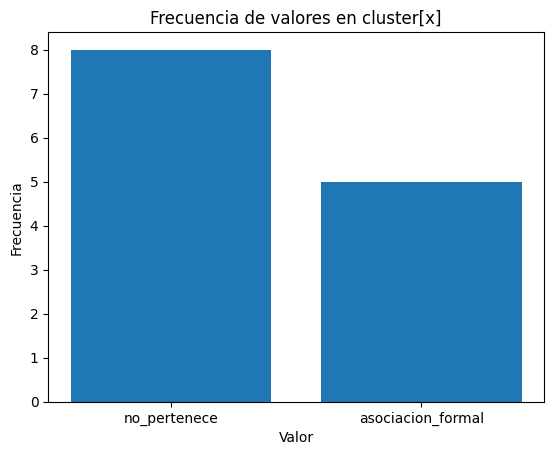

In [234]:
#pertenece a algun grupo asociativo de cacao
freq(cluster_3,'csoc_1',['no_pertenece', 'asociacion_formal'])

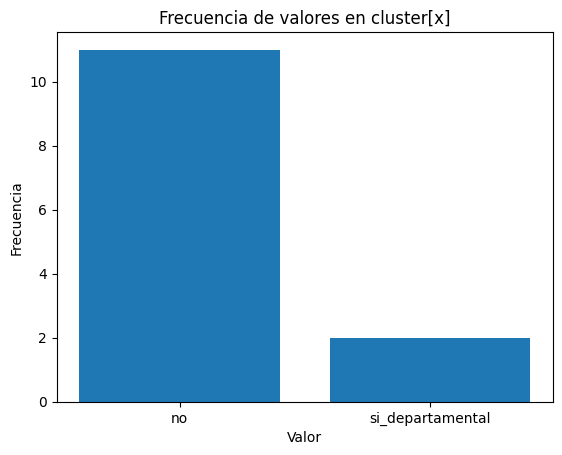

In [235]:
# reciben algun tipo de ayuda economica, asesoria, asitencia tecnica por el estado
freq(cluster_3,'csoc_4',['no', 'si_departamental'])

In [237]:
# frecuancias absolutas de unidades productivas que han recibido ayuda economica, asistencia tecninca por parte del estado.
pd.crosstab(cluster_3['csoc_4'], columns='counts')

col_0,counts
csoc_4,
no,11
si_departamental,2


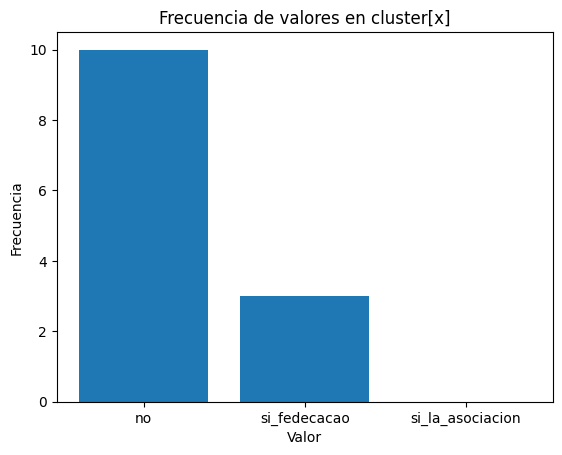

In [238]:
#ayuda economica o asistensia tecnica por otras instituciones
freq(cluster_3,'csoc_5',['no', 'si_fedecacao', 'si_la_asociacion'])

In [239]:
# frecuancias absolutas de unidades productivas que han recibido ayuda economica, asistencia tecninca por otras instituciones.
pd.crosstab(cluster_4['csoc_5'], columns='counts')

col_0,counts
csoc_5,
no,9
si_fedecacao,3
"si_fedecacao,other",1


##########################################################################################

#cluster 4

------------------------------------------------------------------------
#Manejo Agronomico

Q1 =  200.00
Q2 =  300.00
Q3 =  500.00
Rango =  300.00
Valor Minimo =  20.00
Valor Maximo =  1100.00
media =  354.62
mediana =  300.00


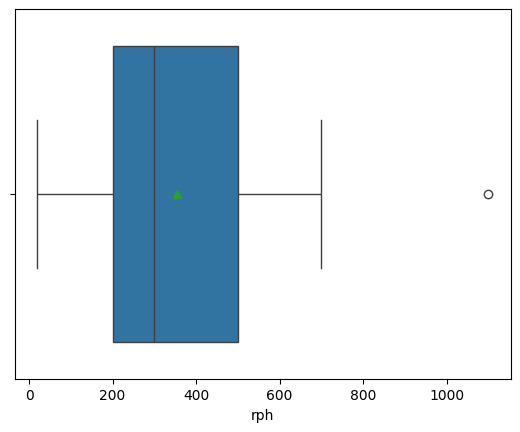

In [240]:
#rph cluster 4 (RENDIMIENTO POR HECTAREA MEDIDA EN Kg al año)
quantile(cluster_4, cluster_4.rph)

Q1 =  8.00
Q2 =  40.00
Q3 =  40.00
Rango =  32.00
Valor Minimo =  2.00
Valor Maximo =  50.00
media =  28.08
mediana =  40.00


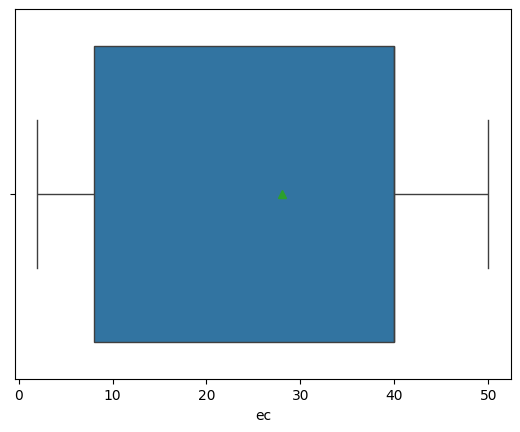

In [241]:
# edad del clutivo en años
quantile(cluster_4, cluster_4.ec)

Q1 =  0.00
Q2 =  4.00
Q3 =  8.00
Rango =  8.00
Valor Minimo =  0.00
Valor Maximo =  30.00
media =  8.77
mediana =  4.00


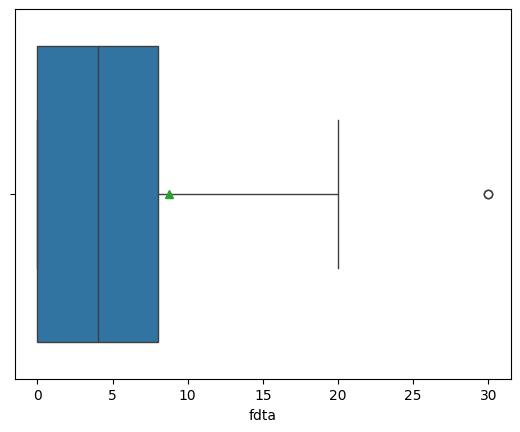

In [243]:
#frecuencia de asigancion de asignacion de turnos para riego medido en dias
quantile(cluster_4, cluster_4.fdta)

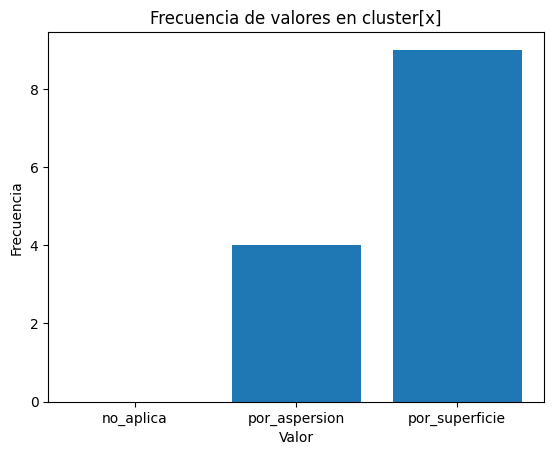

In [244]:
# tipos de sistemas de riego cluster 4
freq(cluster_4, 'tsr',['no_aplica', 'por_aspersion', 'por_superficie'] )

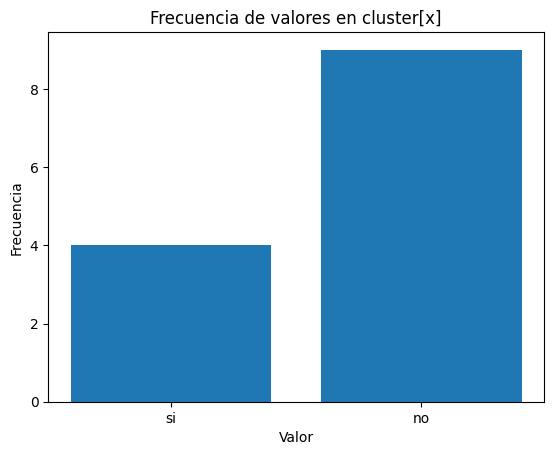

In [245]:
#aplica fertelizante
freq(cluster_4, 'af',['si', 'no'] )

In [246]:
# frecuancias absolutas del numero de unidades productivas que aplican fertilizante
pd.crosstab(cluster_4['af'], columns='counts')

col_0,counts
af,
no,9
si,4


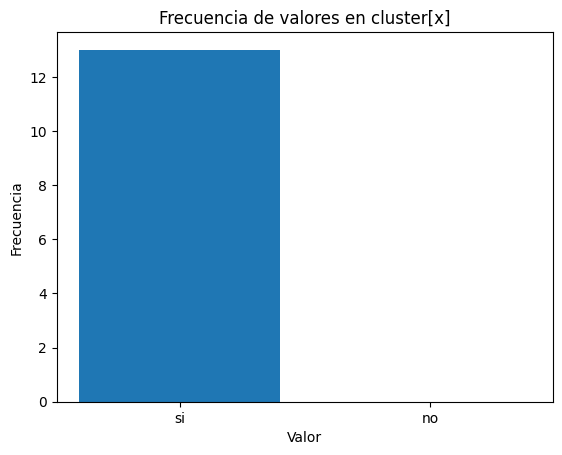

In [247]:
#Presencia de plagas en las unidades productivas
freq(cluster_4, 'ppla',['si', 'no'] )

In [248]:
# frecuancias absolutas del numero de unidades productivas que presentan plagas
pd.crosstab(cluster_4['ppla'], columns='counts')

col_0,counts
ppla,
si,13


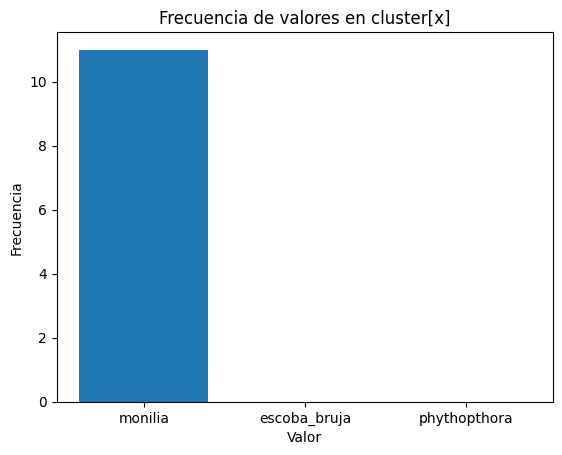

In [249]:
##enfermedad principal
freq(cluster_4, 'tenfm',['monilia', 'escoba_bruja', 'phythopthora'] )

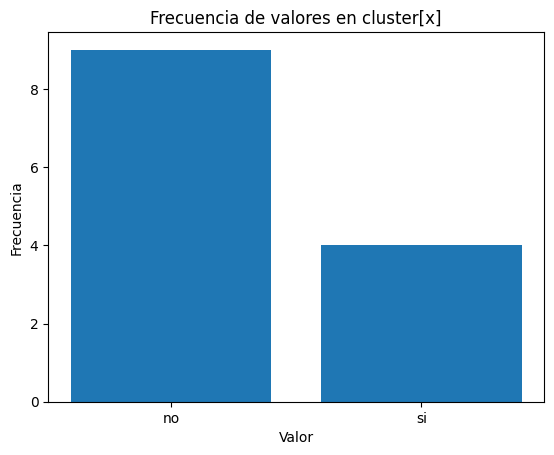

In [250]:

#aplican fungicidas
freq(cluster_4, 'afun',['no', 'si'])

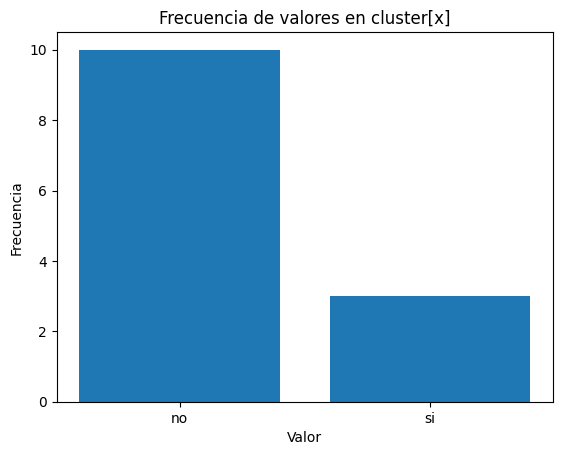

In [251]:
#aplican plagicidas
freq(cluster_4, 'apla',['no', 'si'])

------------------------------------------------------------------------
#Actividades de Postcosecha

In [252]:
#frecuencia absoluta del tipo de postcosecha realizada
pd.crosstab(cluster_4['pstc_1'], columns='counts')

col_0,counts
pstc_1,
extraccion_del_grano,13


In [253]:
#frecuencia absoluta del tipo de infraestructura para la  postcosecha
pd.crosstab(cluster_4['pstc_2'], columns='counts')

col_0,counts
pstc_2,
bandejas_para_secad,1
beneficiadero_propio,2
"cajon_de_fermentacion,bandejas_para_secad",7
other,3


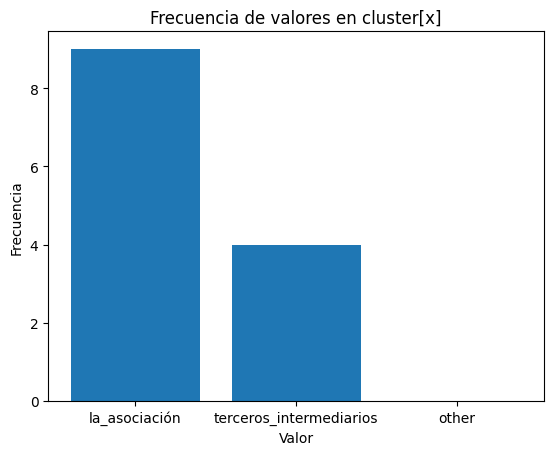

In [254]:
##frecuencia absoluta de la plataforma donde se relaiza la venta de cacao
freq(cluster_4, 'pstc_4',['la_asociación', 'terceros_intermediarios', 'other'])

--------------------------------------------------------------------------------
#Capital Natural

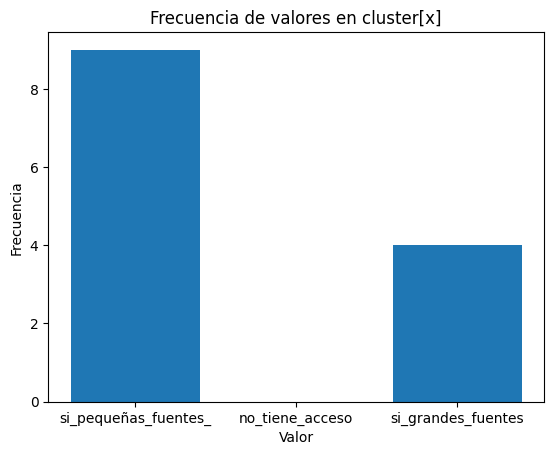

In [255]:
freq(cluster_4, 'cnat_1',['si_pequeñas_fuentes_', 'no_tiene_acceso', 'si_grandes_fuentes'] )

-----------------------------------------------------------
#variedad

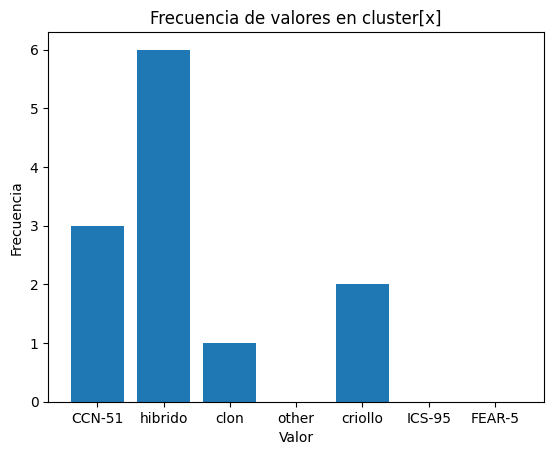

In [257]:
freq(cluster_4, 'vm',['CCN-51', 'hibrido', 'clon', 'other', 'criollo', 'ICS-95',
       'FEAR-5'])

------------------------------------------------------------
#Fisica de suelos

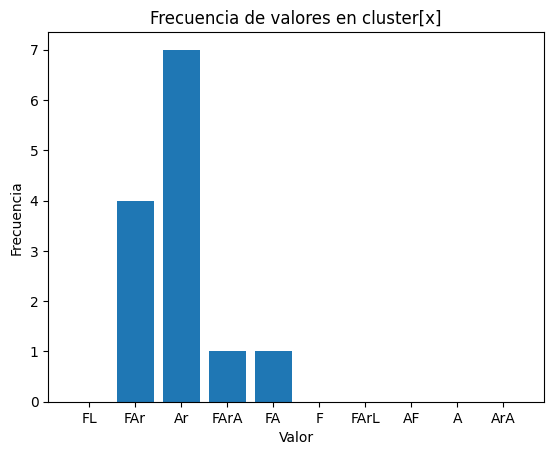

In [258]:
#clases texturales
freq(cluster_4, 'Textura',['FL', 'FAr', 'Ar', 'FArA', 'FA', 'F', 'FArL', 'AF', 'A', 'ArA'])

In [259]:
pd.crosstab(cluster_4['Textura'], columns='counts')#tabla de frecuencias de las clases texturales en el cluster 4

col_0,counts
Textura,
Ar,7
FA,1
FAr,4
FArA,1


Q1 =  5.51
Q2 =  6.57
Q3 =  7.44
Rango =  1.93
Valor Minimo =  5.01
Valor Maximo =  7.71
media =  6.50
mediana =  6.57


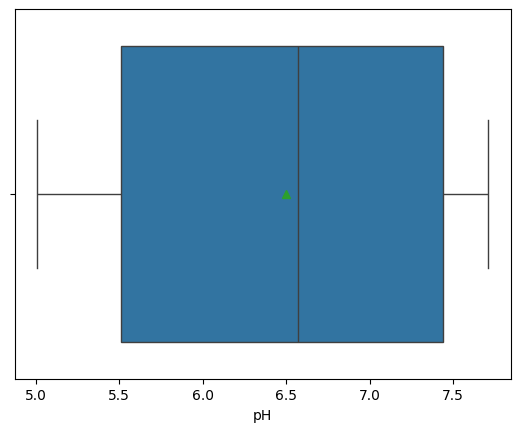

In [260]:
#pH
quantile(cluster_4, cluster_4.pH)


Q1 =  0.07
Q2 =  0.09
Q3 =  0.11
Rango =  0.04
Valor Minimo =  0.06
Valor Maximo =  0.16
media =  0.10
mediana =  0.09


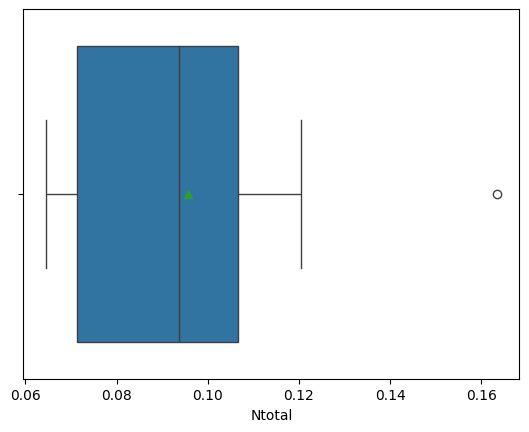

In [261]:
#nitrogeno total
quantile(cluster_4, cluster_4.Ntotal)

Q1 =  1.18
Q2 =  1.36
Q3 =  1.40
Rango =  0.22
Valor Minimo =  1.10
Valor Maximo =  1.47
media =  1.30
mediana =  1.36


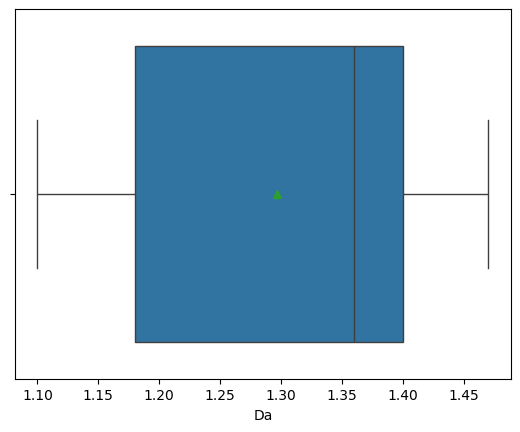

In [262]:
#densidad aparente
quantile(cluster_4, cluster_4.Da)

-----------------------------------------------------
#Capital financiero

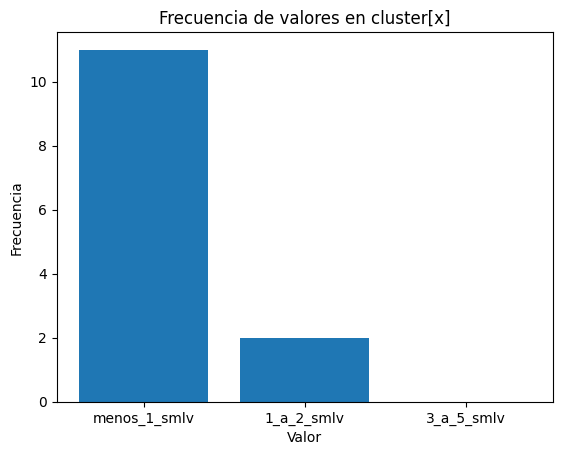

In [263]:
#valor estimado de todos los ingresos mensuales del nucleo familiar
freq(cluster_4,'cfin_1',['menos_1_smlv', '1_a_2_smlv', '3_a_5_smlv'])

In [264]:
# frecuancias absolutas de el valor estimado de todos los ingresos mensuales del nucleo familiar
pd.crosstab(cluster_4['cfin_1'], columns='counts')

col_0,counts
cfin_1,
1_a_2_smlv,2
menos_1_smlv,11


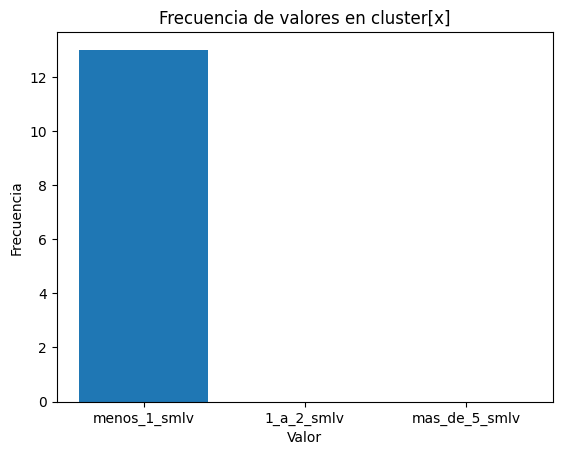

In [265]:
#ingresos solo de la produccion de cacao
freq(cluster_4,'cfin_2',['menos_1_smlv', '1_a_2_smlv', 'mas_de_5_smlv'])

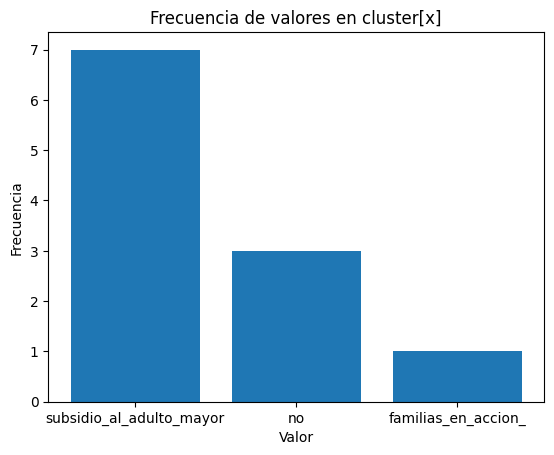

In [266]:
#subsidios recibidos por parte del estado
freq(cluster_4,'cfin_6',['subsidio_al_adulto_mayor', 'no', 'familias_en_accion_'])


In [267]:
# frecuancias absolutas de unidades productivas que reciben subsidios por parte del estado
pd.crosstab(cluster_4['cfin_6'], columns='counts')

col_0,counts
cfin_6,
familias_en_accion_,1
ingreso_solidario,2
no,3
subsidio_al_adulto_mayor,7


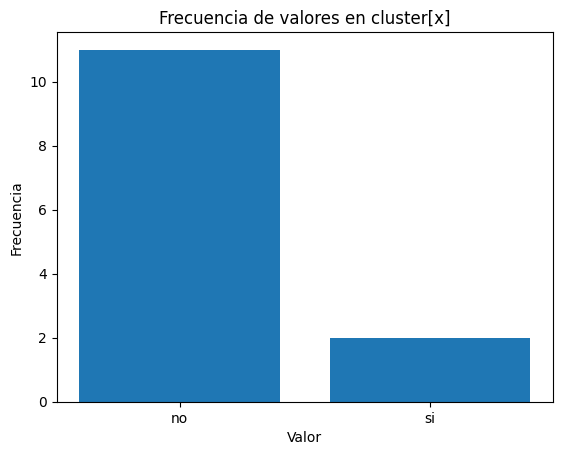

In [268]:
#Diagrama de barra  de unidades productivas que reciben subsidios por parte del estado
freq(cluster_4,'cfin_7',['no', 'si'])

In [269]:
# frecuancias absolutas de unidades productivas que reciben subsidios por parte de la actividad en cacao
pd.crosstab(cluster_4['cfin_7'], columns='counts')

col_0,counts
cfin_7,
no,11
si,2


In [270]:
cluster_4['cfin_2'].unique()

array(['menos_1_smlv'], dtype=object)

--------------------------------------------------------------------------------
#Capital Social

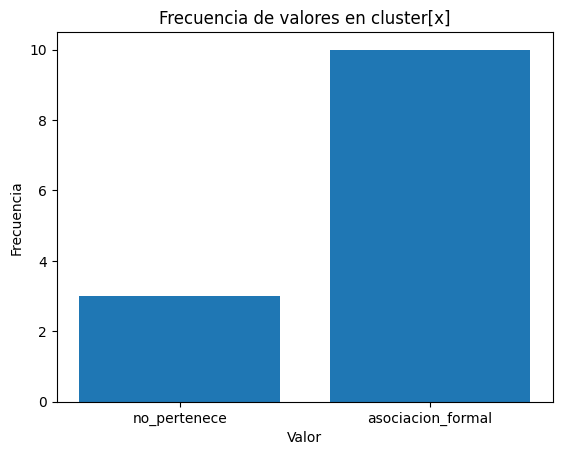

In [271]:
#pertenece a algun grupo asociativo de cacao
freq(cluster_4,'csoc_1',['no_pertenece', 'asociacion_formal'])

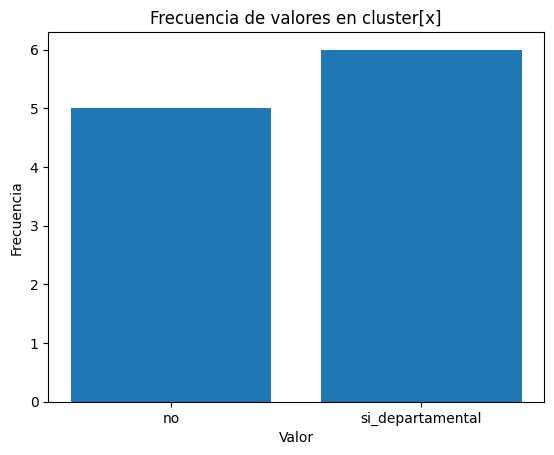

In [272]:
# reciben algun tipo de ayuda economica, asesoria, asitencia tecnica por el estado
freq(cluster_4,'csoc_4',['no', 'si_departamental'])

In [273]:
# frecuancias absolutas de unidades productivas que han recibido ayuda economica, asistencia tecninca por parte del estado.
pd.crosstab(cluster_4['csoc_4'], columns='counts')

col_0,counts
csoc_4,
no,5
si_departamental,6
si_nacional,2


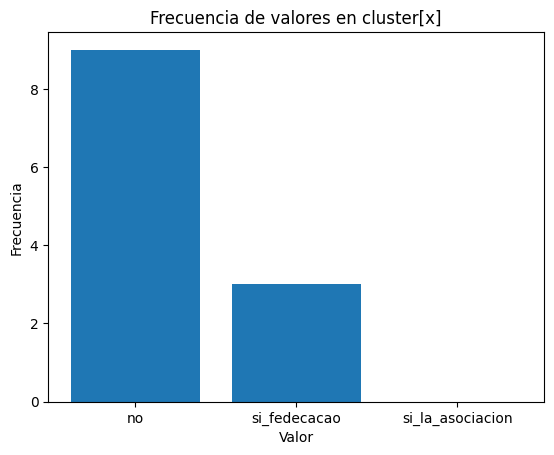

In [274]:
#ayuda economica o asistensia tecnica por otras instituciones
freq(cluster_4,'csoc_5',['no', 'si_fedecacao', 'si_la_asociacion'])

In [275]:
# frecuancias absolutas de unidades productivas que han recibido ayuda economica, asistencia tecninca por otras instituciones.
pd.crosstab(cluster_4['csoc_5'], columns='counts')

col_0,counts
csoc_5,
no,9
si_fedecacao,3
"si_fedecacao,other",1
